## *Parte 1*

Seção que realiza o download dos dados utilizados
import kagglehub
from google.colab import drive
import shutil

Nesta parte armazenamos a planilha de dados escolhida
no Google Drive do usuário

Montando o local de download
drive.mount('/content/drive')
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

Baixa a versão mais recente dos dados
path = kagglehub.dataset_download("mohamedtag04/egypt-network-performance-data-q4-2023")

Copiar os arquivos
shutil.copytree(path, dest_path)
print("Path to dataset files:", path)

In [ ]:
!pip install geopandas
!pip install geopy
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install leafmap mapclassify
!pip geodesic

ERROR: unknown command "geodesic"


In [ ]:
#importando bibliotecas
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import leafmap.foliumap as leafmap
import folium
import scipy.stats as stats
from geopy.distance import geodesic



O dataframe possui as seguintes caracteristicas:

* avg_d_kbps

    Velocidade média de download em quilobits por segundo.

* avg_u_kbps
    
    Velocidade média de upload em quilobits por segundo.


* avg_lat_ms
    
    Latência média em milissegundos, indicando a capacidade de resposta da rede.


* tests
    
    Número de testes realizados, fornecendo informações sobre o volume de pontos de dados.


* dispositivos

    Número de dispositivos usados ​​nos testes, oferecendo insights de diversidade.


* centroide_lat
    
    Coordenada de latitude do centroide geográfico da localização da rede.


* centróide_lon

    Coordenada de longitude do centroide geográfico da localização da rede.


* cidade

    Nome da cidade associada aos dados de desempenho da rede.


* velocidade_avg_mbps

    Velocidade média de download convertida em megabits por segundo para maior conveniência.


* velocidade_média_u_mbps

    Velocidade média de upload convertida em megabits por segundo para maior conveniência.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Caminho onde os dados já estão salvos
dest_path = "/content/drive/MyDrive/EST/Trabalho01"

# Ler direto do arquivo salvo
import pandas as pd

df = pd.read_csv(dest_path + "/networkperformance.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,city,avg_d_speed_mbps,avg_u_speed_mbps
0,0,91528,94732,4,1,1,27.569156,27.567444,Qaşr al Farāfirah,91.528,94.732
1,1,76459,64054,17,1,1,27.134924,27.924500,Qaşr al Farāfirah,76.459,64.054
2,2,24891,15299,13,7,3,27.061572,27.875061,Qaşr al Farāfirah,24.891,15.299
3,3,36193,56719,14,4,2,27.066463,27.891541,Qaşr al Farāfirah,36.193,56.719
4,4,101906,80136,11,10,2,27.061572,27.891541,Qaşr al Farāfirah,101.906,80.136


#### Plotando Mapas para observar a localização dos doados


In [ ]:
from shapely.geometry import Point

# Pega os dados de locali~ão das amostras
data_geo = df[['centroid_lat', 'centroid_lon', 'city']].copy()

# Transformando em coordenadas geograficas
data_geo['geometry'] = gpd.points_from_xy(data_geo['centroid_lon'], data_geo['centroid_lat'])

# Converte para um GeoDataFrame
geo_df = gpd.GeoDataFrame(data_geo, geometry="geometry")
print(geo_df.head())


   centroid_lat  centroid_lon               city                   geometry
0     27.569156     27.567444  Qaşr al Farāfirah  POINT (27.56744 27.56916)
1     27.134924     27.924500  Qaşr al Farāfirah   POINT (27.9245 27.13492)
2     27.061572     27.875061  Qaşr al Farāfirah  POINT (27.87506 27.06157)
3     27.066463     27.891541  Qaşr al Farāfirah  POINT (27.89154 27.06646)
4     27.061572     27.891541  Qaşr al Farāfirah  POINT (27.89154 27.06157)


In [ ]:
df.head()
df.info()
df.describe(include='object')  # Para dados categóricos e texto
df.columns  # Ver quais colunas existem


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17871 entries, 0 to 17870
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17871 non-null  int64  
 1   avg_d_kbps        17871 non-null  int64  
 2   avg_u_kbps        17871 non-null  int64  
 3   avg_lat_ms        17871 non-null  int64  
 4   tests             17871 non-null  int64  
 5   devices           17871 non-null  int64  
 6   centroid_lat      17871 non-null  float64
 7   centroid_lon      17871 non-null  float64
 8   city              17871 non-null  object 
 9   avg_d_speed_mbps  17871 non-null  float64
 10  avg_u_speed_mbps  17871 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.5+ MB


Index(['Unnamed: 0', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests',
       'devices', 'centroid_lat', 'centroid_lon', 'city', 'avg_d_speed_mbps',
       'avg_u_speed_mbps'],
      dtype='object')

In [ ]:
# Tabela 1:
# Calcula estatísticas de cada coluna do conjunto
df.describe()


,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,centroid_lat,centroid_lon,avg_d_speed_mbps,avg_u_speed_mbps
count,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000,17871.000000
mean,8935.000000,24320.552739,9353.365285,37.065637,42.168653,11.246936,30.253199,31.245289,24.320553,9.353365
std,5159.057666,39175.021429,22929.843534,72.937887,140.815593,102.817435,0.685185,0.409037,39.175021,22.929844
min,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,24.674474,27.567444,0.004000,0.004000
25%,4467.500000,9288.000000,1275.000000,13.000000,2.000000,1.000000,30.004895,30.989685,9.288000,1.275000
50%,8935.000000,16839.000000,2928.000000,21.000000,7.000000,2.000000,30.299389,31.231384,16.839000,2.928000
75%,13402.500000,24440.000000,5192.500000,35.000000,31.000000,8.000000,30.696973,31.451111,24.440000,5.192500
max,17870.000000,791794.000000,491476.000000,2456.000000,13422.000000,13311.000000,31.524703,33.192444,791.794000,491.476000


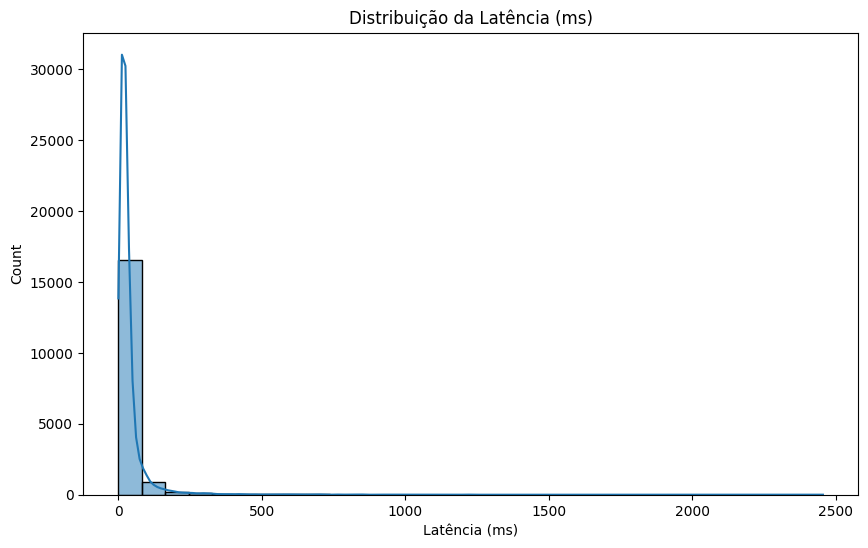

In [ ]:


# Grafico 1:
# Plota o histograma de latência com os outliers


plt.figure(figsize=(10,6))
sns.histplot(df['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribuição da Latência (ms)')
plt.xlabel('Latência (ms)')
plt.show()


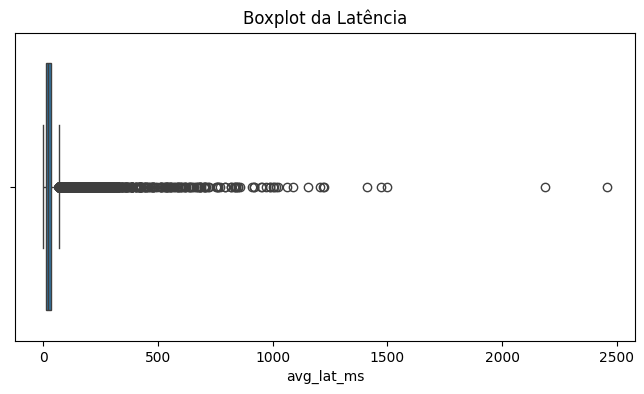

In [ ]:

# Grafico 2:
# Plota o boxplot da latência

plt.figure(figsize=(8,4))
sns.boxplot(x=df['avg_lat_ms'])
plt.title('Boxplot da Latência')
plt.show()


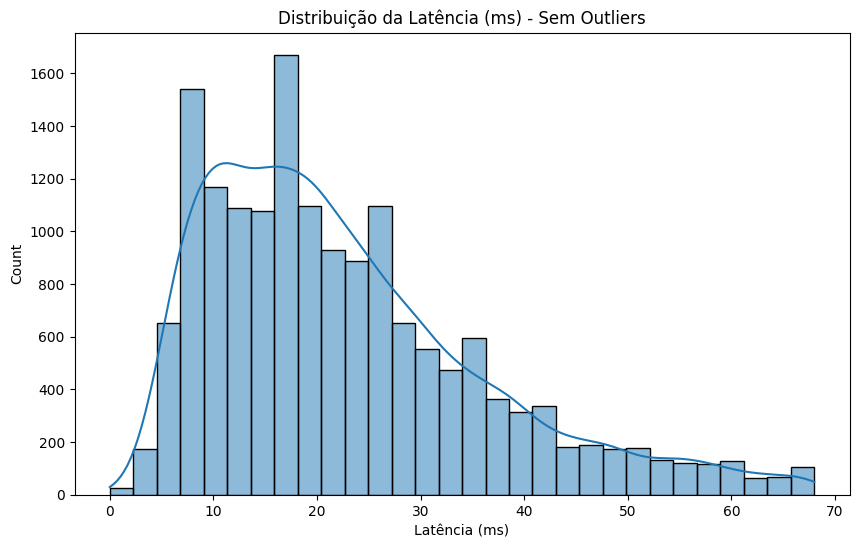

In [ ]:
# Grafico 3:
# Histograma de latência sem outliers

# Calcula os limites do boxplot
q1 = df['avg_lat_ms'].quantile(0.25)
q3 = df['avg_lat_ms'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtra os dados removendo os outliers
df_sem_outliers = df[(df['avg_lat_ms'] >= limite_inferior) & (df['avg_lat_ms'] <= limite_superior)]


plt.figure(figsize=(10,6))
sns.histplot(df_sem_outliers['avg_lat_ms'], kde=True, bins=30)
plt.title('Distribuição da Latência (ms) - Sem Outliers')
plt.xlabel('Latência (ms)')
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap


# Define o mapa
# Centraliza o mapa a partir da média de todos os centroides dados

m = folium.Map(
    location=[df['centroid_lat'].mean(), df['centroid_lon'].mean()],
    zoom_start=6,
    tiles='CartoDB positron'  # Tiles em inglês, limpo e leve
)

# Cria uma lista de listas que contem os dados dos centroides
# das cidades e latencia media em cada um
heat_data = [
    [row['centroid_lat'], row['centroid_lon'], row['avg_lat_ms']]
    for index, row in df.iterrows() if not pd.isnull(row['avg_lat_ms'])
]

# Plota o heatmap a partir dos dados de heat_data
# em cima do mapa m
HeatMap(heat_data, radius=10).add_to(m)

m


#### Analisando Latencia por Cidades
Gera um agrupamento dos dados de latencia a partir da cidades egipcias e descreve alguns marcadores importantes

count → quantidade de registros

mean → média

std → desvio padrão

min → menor valor

25% → primeiro quartil

50% → mediana

75% → terceiro quartil

max → maior valor

In [ ]:
# Delimita dados para apenas latencia e cidade
lat_city = df[['city','avg_lat_ms']]
lat_city

,city,avg_lat_ms
0,Qaşr al Farāfirah,4
1,Qaşr al Farāfirah,17
2,Qaşr al Farāfirah,13
3,Qaşr al Farāfirah,14
4,Qaşr al Farāfirah,11
...,...,...
17866,Al Khārjah,22
17867,Al Khārjah,14
17868,Al Khārjah,28
17869,Al Khārjah,59


In [ ]:
# Agrupa dados por cidade, calculando instâncias,
# média, desvio padrão, mínimo, Q1, mediana, Q3, e máximo
lat_city = df.groupby('city')['avg_lat_ms'].describe().sort_values(by='mean', ascending=False)
lat_city

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Ra’s Ghārib,11.0,130.454545,363.228678,9.0,10.00,12.0,30.50,1224.0
Rosetta,2.0,89.500000,92.630988,24.0,56.75,89.5,122.25,155.0
Al Qūşīyah,7.0,68.857143,49.113571,20.0,29.00,45.0,110.00,139.0
Qufādah,70.0,59.342857,66.773657,7.0,23.00,33.0,62.50,306.0
Banī ‘Ubayd,45.0,57.600000,135.024139,0.0,18.00,26.0,37.00,820.0
...,...,...,...,...,...,...,...,...
Madīnat as Sādis min Uktūbar,724.0,22.182320,32.721591,1.0,8.00,15.0,25.00,597.0
Sidmant al Jabal,63.0,21.238095,17.128277,6.0,10.00,16.0,26.00,86.0
Qaşr al Farāfirah,13.0,20.692308,16.799725,4.0,13.00,14.0,19.00,69.0


In [ ]:
# Acha a cidade de mais registros e a quantidade
cidade_mais_registros = lat_city['count'].idxmax()
quantidade = lat_city['count'].max()

print(f'A cidade com mais registros é {cidade_mais_registros} com {quantidade} registros.')

# Acha a cidade de menos registros e a quantidade
cidade_menos_registros = lat_city['count'].idxmin()
quantidade_min = lat_city['count'].min()

print(f'A cidade com mais registros é {cidade_menos_registros} com {quantidade_min} registros.')


A cidade com mais registros é Cairo com 1586.0 registros.
A cidade com mais registros é Maţāy com 1.0 registros.


In [ ]:
# Função para calcular distância entre dois pontos geográficos

def calcular_distancia(cidade1, cidade2, dataframe):

    # Procura os nomes de cidades dados e devolve os centroides delas
    coord1 = dataframe[dataframe['city'] == cidade1][['centroid_lat', 'centroid_lon']].iloc[0]
    coord2 = dataframe[dataframe['city'] == cidade2][['centroid_lat', 'centroid_lon']].iloc[0]

    # Utiliza da função de distancia em quilômetros do geodesic
    return geodesic((coord1['centroid_lat'], coord1['centroid_lon']), (coord2['centroid_lat'], coord2['centroid_lon'])).kilometers


In [ ]:
calcular_distancia(cidade_mais_registros, cidade_menos_registros, data_geo)

187.4849729254773

pltando um histograma da distribuição de latencia por cidade

array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'mean'}>,
        <Axes: title={'center': 'std'}>],
       [<Axes: title={'center': 'min'}>, <Axes: title={'center': '25%'}>,
        <Axes: title={'center': '50%'}>],
       [<Axes: title={'center': '75%'}>, <Axes: title={'center': 'max'}>,
        <Axes: >]], dtype=object)

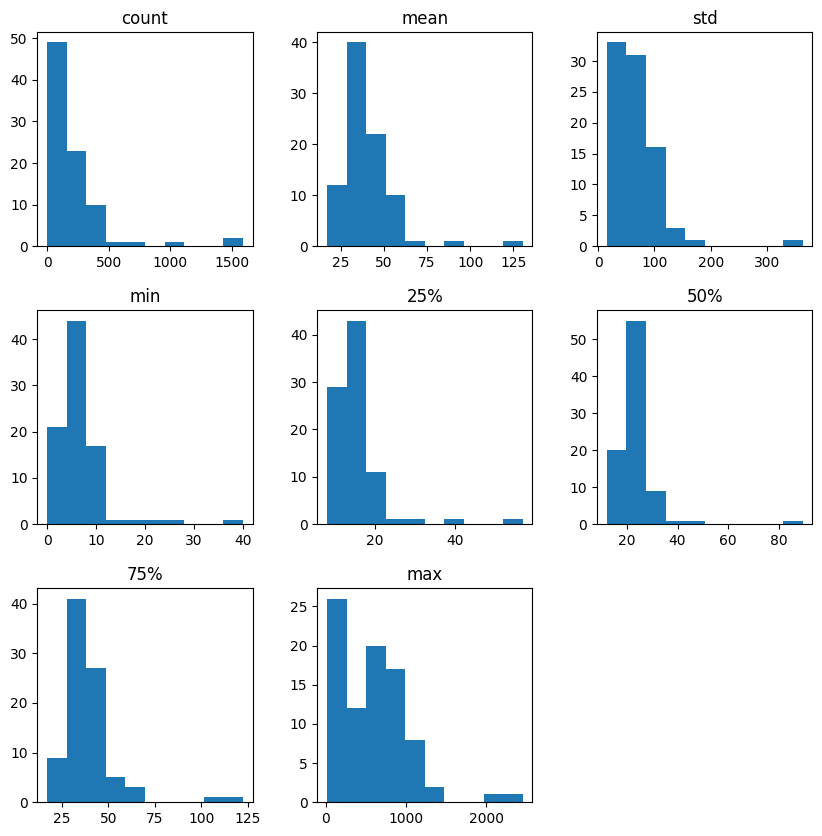

In [ ]:
# Histograma da distribuição de latencia por cidade,
# para diversas estatísticas
lat_city.hist(grid=False, figsize=(10,10))

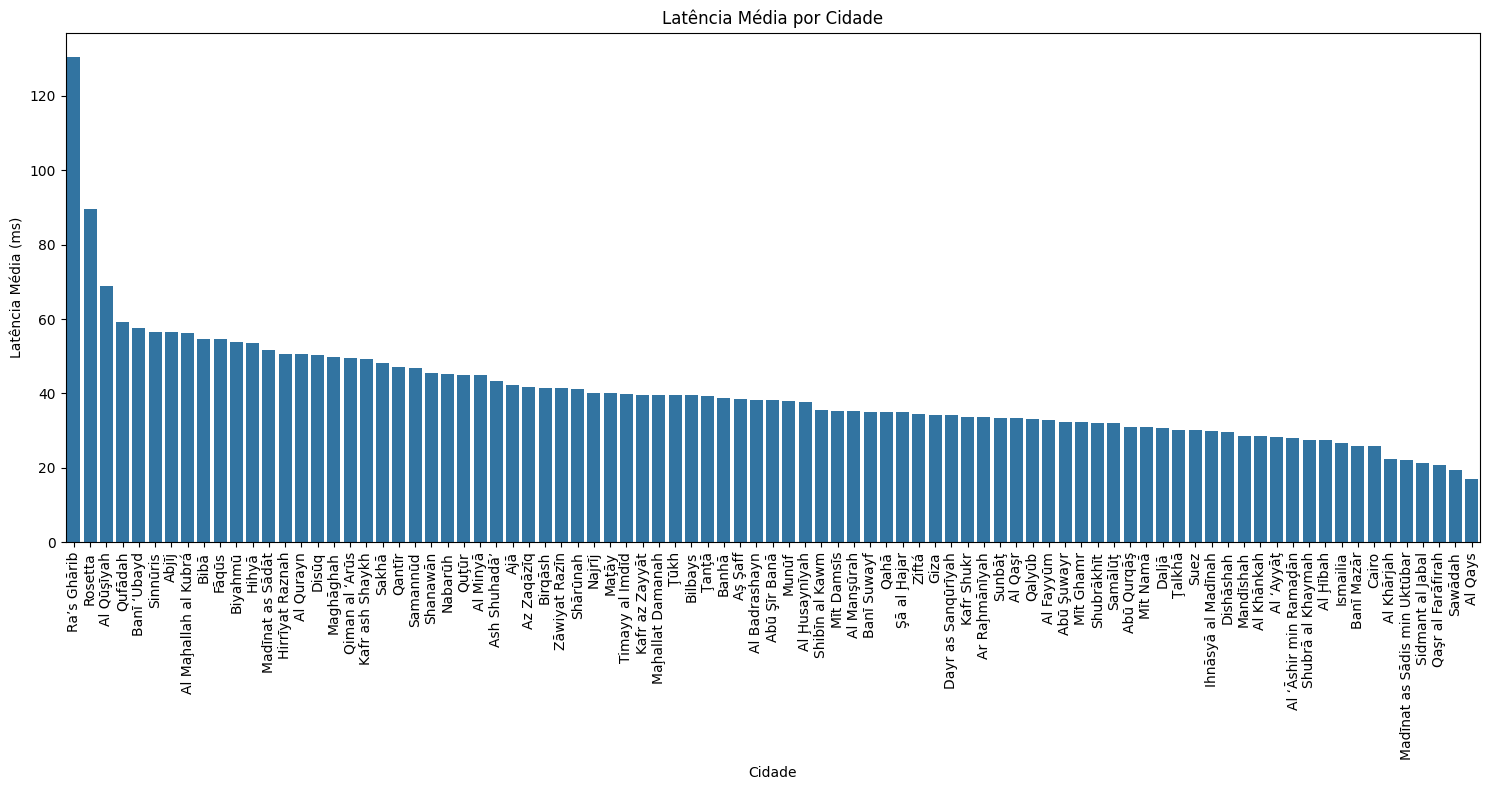

In [ ]:
# Calcula a latência média por cidade
latencia_media_por_cidade = df.groupby('city')['avg_lat_ms'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=latencia_media_por_cidade.index, y=latencia_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Latência Média por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Latência Média (ms)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

####  Analisando a velocidades de upload e downloads

In [ ]:
# Criando um sub-dataframe que armazena as médias de download (avg_d_kbps) e upload (avg_u_kbps) por cidade
city_speeds_description = df.groupby('city')[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].mean()

# Ordenando as cidades pela média de velocidade de download (avg_d_kbps) em ordem decrescente
veloc_avgs = city_speeds_description.sort_values(by='avg_d_kbps', ascending=False)

# Exibindo o dataframe ordenado, com as cidades e suas respectivas velocidades médias de download e upload
veloc_avgs


,avg_d_kbps,avg_u_kbps,avg_lat_ms
city,,,
Al ‘Āshir min Ramaḑān,53015.560976,26629.715122,27.967805
Abū Şuwayr,50477.116883,28952.071429,32.376623
Madīnat as Sādis min Uktūbar,42184.595304,21802.396409,22.182320
Al Khānkah,41977.871438,19403.220676,28.491054
Cairo,38958.408575,18492.764817,25.757251
...,...,...,...
Shārūnah,7847.800000,1756.560000,41.280000
Al Qūşīyah,3483.428571,1284.000000,68.857143
Maţāy,2678.000000,552.000000,40.000000


In [ ]:
veloc_avgs.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms
count,87.000000,87.000000,87.000000
mean,17539.398958,5642.901252,40.118131
std,8975.831068,5994.515904,15.230042
min,852.000000,278.000000,17.000000
25%,13202.769145,2606.798795,31.520468
50%,15605.342365,3409.555556,38.189655
75%,18874.963517,5673.755522,46.166360
max,53015.560976,31253.384615,130.454545


array([[<Axes: title={'center': 'avg_d_kbps'}>,
        <Axes: title={'center': 'avg_u_kbps'}>],
       [<Axes: title={'center': 'avg_lat_ms'}>, <Axes: >]], dtype=object)

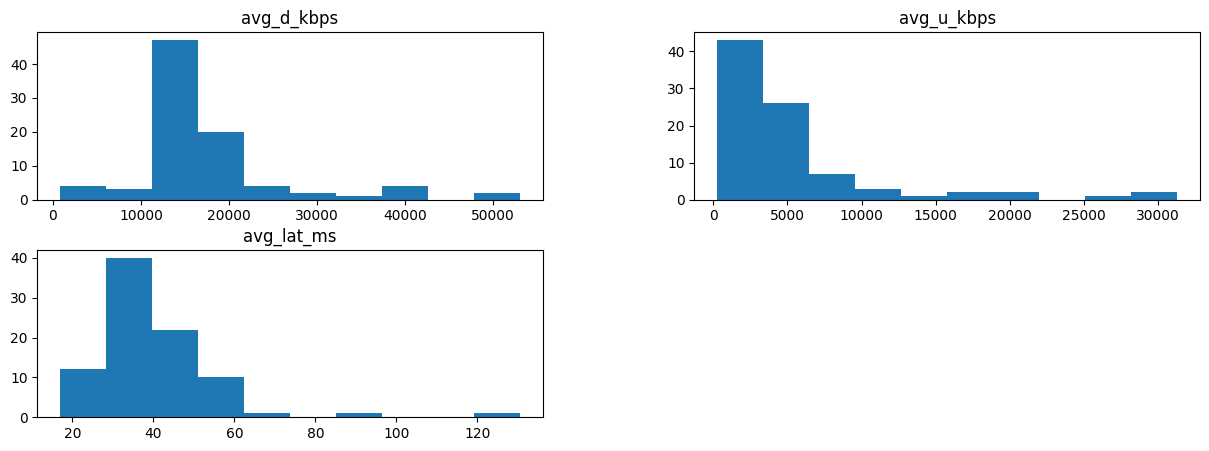

In [ ]:
# Histogramas de velocidade média de download, upload e latência média
veloc_avgs.hist(grid=False, figsize=(15,5))

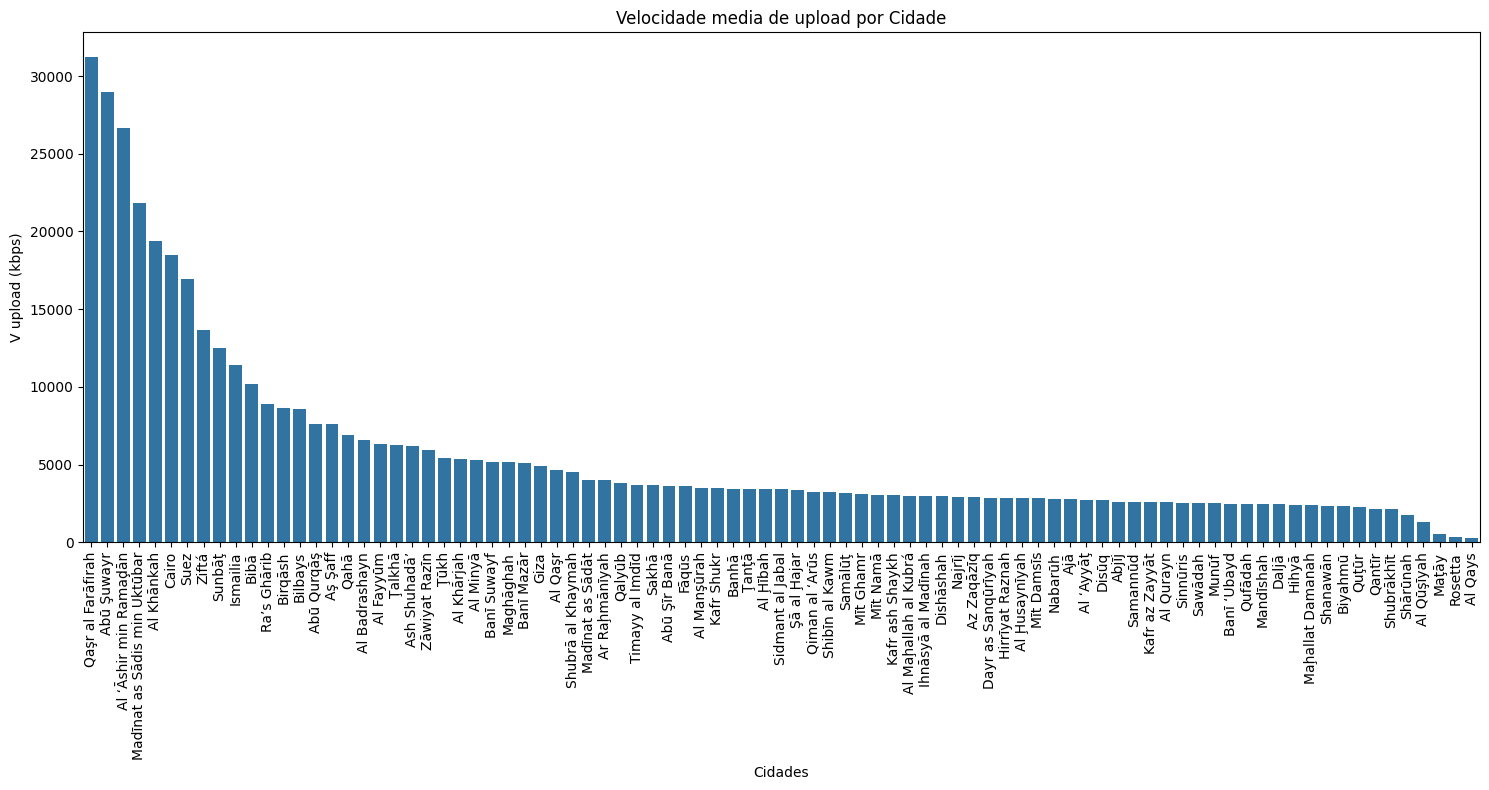

In [ ]:
# Calcula a velocidades média de upload por cidade
velu_media_por_cidade = veloc_avgs.groupby('city')['avg_u_kbps'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=velu_media_por_cidade.index, y=velu_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Velocidade media de upload por Cidade')
plt.xlabel('Cidades')
plt.ylabel('V upload (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [ ]:
velu_media_por_cidade

,avg_u_kbps
city,
Qaşr al Farāfirah,31253.384615
Abū Şuwayr,28952.071429
Al ‘Āshir min Ramaḑān,26629.715122
Madīnat as Sādis min Uktūbar,21802.396409
Al Khānkah,19403.220676
...,...
Shārūnah,1756.560000
Al Qūşīyah,1284.000000
Maţāy,552.000000


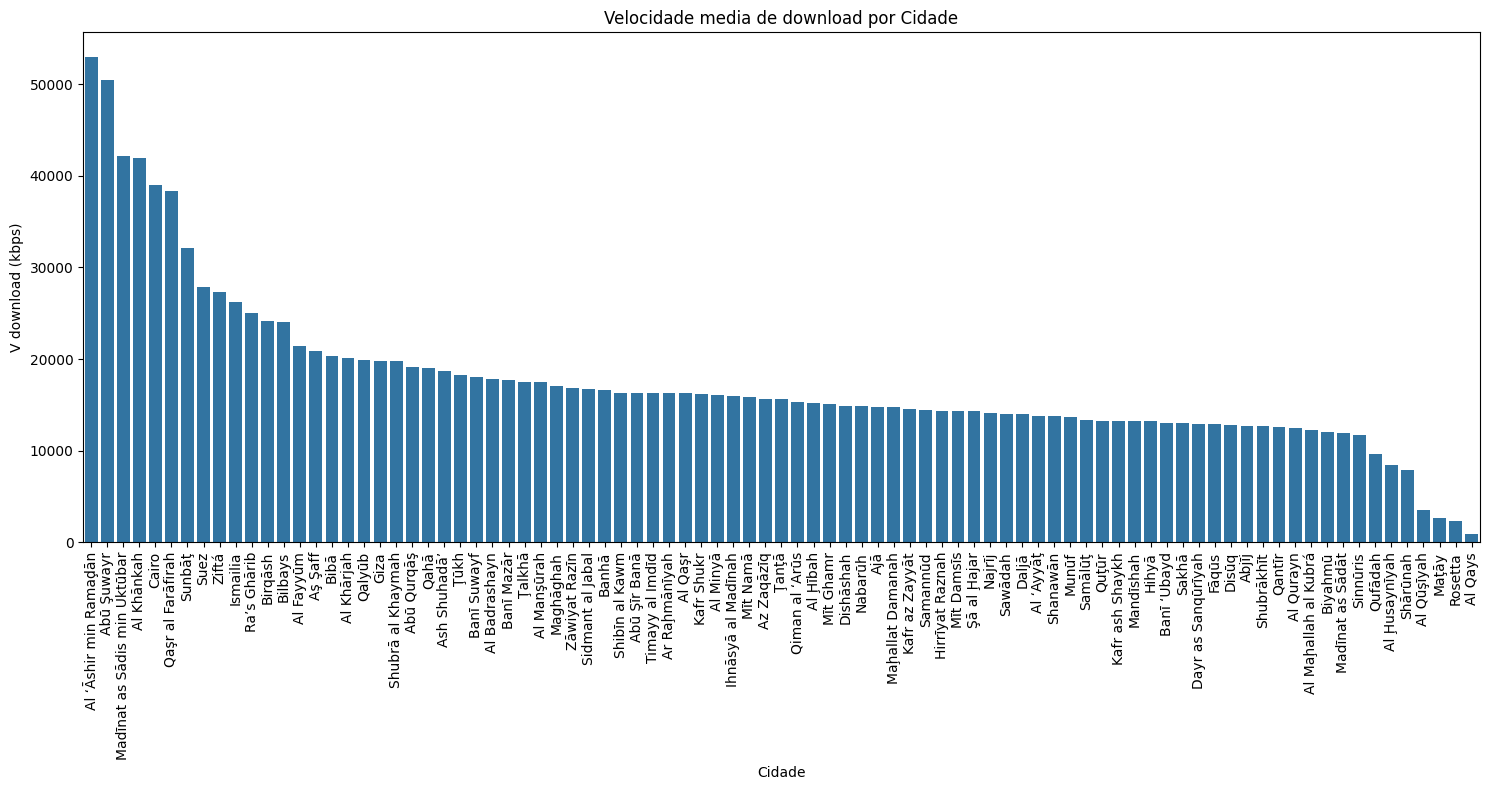

In [ ]:
# Calcula a latência média por cidade
veld_media_por_cidade = veloc_avgs.groupby('city')['avg_d_kbps'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=veld_media_por_cidade.index, y=veld_media_por_cidade.values)
plt.xticks(rotation=90) # Rota os rótulos do eixo x para melhor legibilidade
plt.title('Velocidade media de download por Cidade')
plt.xlabel('Cidade')
plt.ylabel('V download (kbps)')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

* velocidades por cidades

In [ ]:
vel_max = veloc_avgs['avg_d_kbps'].max()
cidade_mais_rapida = veloc_avgs['avg_d_kbps'].idxmax()

vel_min = veloc_avgs['avg_d_kbps'].min()
cidade_mais_lenta = veloc_avgs['avg_d_kbps'].idxmin()


print(f'A cidade com velocidade mais rápida é {cidade_mais_rapida} com {vel_max:.2f} kbps.')
print(f'A cidade com velocidade mais lenta é {cidade_mais_lenta} com {vel_min:.2f} kbps.')

A cidade com velocidade mais rápida é Al ‘Āshir min Ramaḑān com 53015.56 kbps.
A cidade com velocidade mais lenta é Al Qays com 852.00 kbps.


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_d_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de downloads mais rápidas:\n", veloc_avgs_sorted.head(5))


5 Velocidades de downloads mais rápidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Al ‘Āshir min Ramaḑān         53015.560976  26629.715122   27.967805
Abū Şuwayr                    50477.116883  28952.071429   32.376623
Madīnat as Sādis min Uktūbar  42184.595304  21802.396409   22.182320
Al Khānkah                    41977.871438  19403.220676   28.491054
Cairo                         38958.408575  18492.764817   25.757251


In [ ]:
df['city'].value_counts()
# Ordena do maior para o menor
veloc_avgs_sorted = veloc_avgs.sort_values(by='avg_u_kbps', ascending=False)

# Exibe as 5 primeiras
print("5 Velocidades de uploads mais rápidas:\n", veloc_avgs_sorted.head(5))

5 Velocidades de uploads mais rápidas:
                                 avg_d_kbps    avg_u_kbps  avg_lat_ms
city                                                                
Qaşr al Farāfirah             38395.461538  31253.384615   20.692308
Abū Şuwayr                    50477.116883  28952.071429   32.376623
Al ‘Āshir min Ramaḑān         53015.560976  26629.715122   27.967805
Madīnat as Sādis min Uktūbar  42184.595304  21802.396409   22.182320
Al Khānkah                    41977.871438  19403.220676   28.491054


### Latencia e Velocidade

Latencia é o atraso da comunicão e a velocidade é quantidades de dados transferidos por segundos

1 ou -1 -> forte relação entres as medidas

0 -> nenhuma correlação

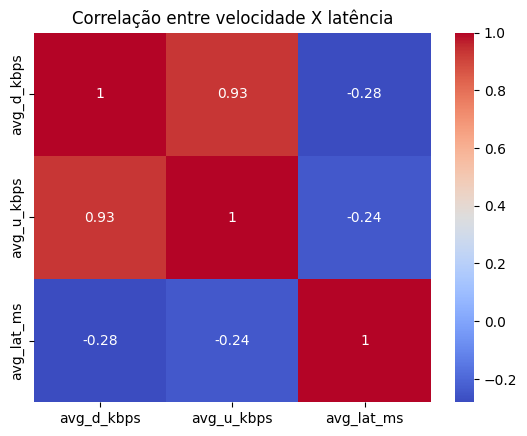

In [ ]:
corr_lat_v = veloc_avgs[['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms']].corr()
# Plota a grafico

sns.heatmap(corr_lat_v, annot=True, cmap='coolwarm')
plt.title('Correlação entre velocidade X latência')
plt.show()

## **Parte 2** Inferência Estatistica e Modelos de Regressão Linear

### **Inferência Estatistica**

#### **Estimação de Parâmetros**

Para a latência média, a variável principal:
* média
* desvio padrão
* percentis de latencia



In [ ]:
#obtendo os dados da variavel de interesse
latencia =  df['avg_lat_ms']

#obtendo as estatisticas descritivas basicas da variavel
stat_desc = {
    'Media' : latencia.mean(),
    'Mediana': latencia.median(),
    'Desvio Padrão': latencia.std(),
    'Variância': latencia.var(),
    'Mínimo': latencia.min(),
    'Máximo': latencia.max(),
    'Amplitude': latencia.max() - latencia.min(),
    'Coef. Variação': (latencia.std() / latencia.mean()) * 100
}
print("Tamanho da amostra: ", len(latencia))
print("** Estatisticas Descritivas sobre a Latência **")
for stat, value in stat_desc.items():
  print(f"{stat:14}: {value:.4f}")

Tamanho da amostra:  17871
** Estatisticas Descritivas sobre a Latência **
Media         : 37.0656
Mediana       : 21.0000
Desvio Padrão : 72.9379
Variância     : 5319.9353
Mínimo        : 0.0000
Máximo        : 2456.0000
Amplitude     : 2456.0000
Coef. Variação: 196.7803


O fato da média ser maior do que a mediana colabora com os gráficos de outliers extremos que tivemos na parte 1. Os valores extremos parecem arrastar a média para um valor a mais que a mediana. Podemos verificar o mesmo com os percentis abaixo.

In [ ]:
#avaliando os percentis
p_values = [5, 10, 25, 50, 75, 90, 95,99]


for p in p_values:
  valor = np.percentile(latencia, p)
  if p == 10:
    p10 = valor
  elif p == 50:
    p50 = valor
  elif p == 90:
    p90 = valor
  print(f"P{p:2d}: {valor:.4f}")

dif_inferior = p50 - p10
porc_inferior = dif_inferior * 100 / p50

dif_superior = p90 - p50
porc_superior = dif_superior * 100 / p50

dif_sup_inf = porc_superior - porc_inferior
porc_dif = dif_sup_inf * 100 / porc_inferior

print(f"Do P50 ({p50}) até o P10 ({p10}) o decrescimo é de apenas {dif_inferior:.1f} (-{porc_inferior:.1f}%)")
print(f"Do P50 ({p50}) até o P90 ({p90}) o aumento é de {dif_superior:.1f} ({porc_superior:.1f}%)")
print(f"Diferença de módulo entre acrescimos: o superior é {dif_sup_inf:.1f} ({porc_dif:.1f}%) maior em relação ao inferior")

P 5: 7.0000
P10: 8.0000
P25: 13.0000
P50: 21.0000
P75: 35.0000
P90: 66.0000
P95: 105.0000
P99: 315.3000
Do P50 (21.0) até o P10 (8.0) o decrescimo é de apenas 13.0 (-61.9%)
Do P50 (21.0) até o P90 (66.0) o aumento é de 45.0 (214.3%)
Diferença de módulo entre acrescimos: o superior é 152.4 (246.2%) maior em relação ao inferior


Assim, os percentis acima demonstram que há assimetria positiva (para a direita). Pelo menos 10% dos dados estão muito acima da mediana, com pelo menos 214,3% de aumento. Em contraste, os 10% dos dados com menores valores possuem um decrescimo de pelo menos 61,9%. Se utilizarmos a porcentagem de decrescimo inferior como base, o aumento superior foi 246,2% maior, oque é muito significativo.

Portanto, vamos analisar a condição dos outliers:

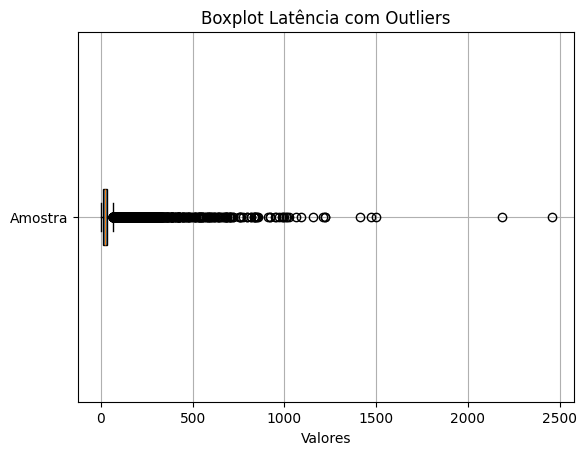

In [ ]:
# Criar boxplot
plt.boxplot(latencia, vert=False, patch_artist=True)

# Adicionar título e legenda
plt.title('Boxplot Latência com Outliers')
plt.xlabel('Valores')
plt.yticks([1], ['Amostra'])

# Exibir gráfico
plt.grid(True)
plt.show()

Como há muito outliers, vamos utilizar os dados já tratados, conforme fizemos na parte 1 do trabalho.

In [ ]:
lat_treat = df_sem_outliers['avg_lat_ms']

#obtendo as estatisticas descritivas basicas da variavel
stat_desc2 = {
    'Media' : lat_treat.mean(),
    'Mediana': lat_treat.median(),
    'Desvio Padrão': lat_treat.std(),
    'Variância': lat_treat.var(),
    'Mínimo': lat_treat.min(),
    'Máximo': lat_treat.max(),
    'Amplitude': lat_treat.max() - lat_treat.min(),
    'Coef. Variação': (lat_treat.std() / lat_treat.mean()) * 100
}
print("Tamanho da amostra: ", len(lat_treat))
print("** Estatisticas Descritivas sobre a Latência **")
for stat, value in stat_desc2.items():
  print(f"{stat:14}: {value:.4f}")

Tamanho da amostra:  16157
** Estatisticas Descritivas sobre a Latência **
Media         : 22.7081
Mediana       : 20.0000
Desvio Padrão : 13.5701
Variância     : 184.1482
Mínimo        : 0.0000
Máximo        : 68.0000
Amplitude     : 68.0000
Coef. Variação: 59.7591


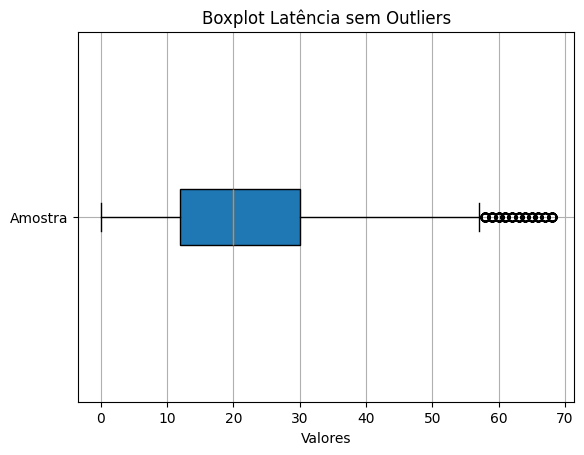

In [ ]:

# Criar boxplot
plt.boxplot(lat_treat, vert=False, patch_artist=True)

# Adicionar título e legenda
plt.title('Boxplot Latência sem Outliers')
plt.xlabel('Valores')
plt.yticks([1], ['Amostra'])

# Exibir gráfico
plt.grid(True)
plt.show()

O novo boxplot permite ver que a distribuição assimétrica positiva permanece.

Para verificar o mesmo, fazemos a gráfico de distribuição:

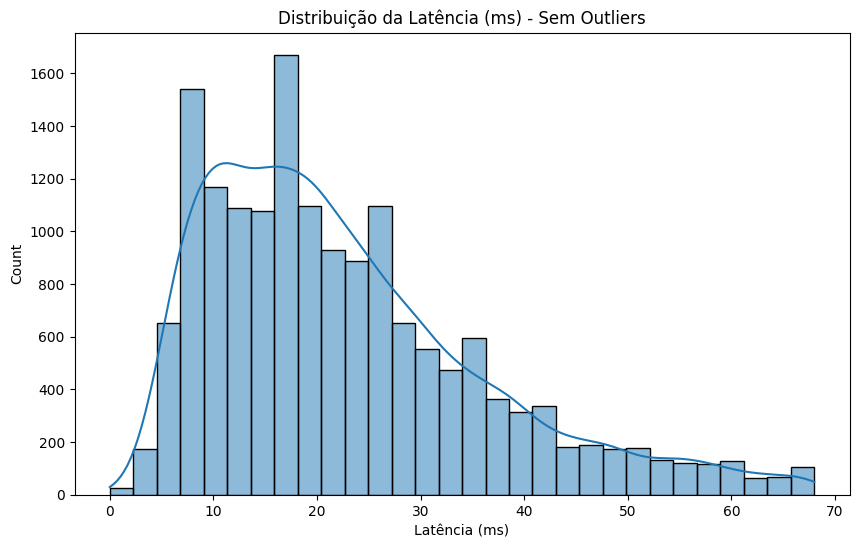

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(lat_treat, kde=True, bins=30)
plt.title('Distribuição da Latência (ms) - Sem Outliers')
plt.xlabel('Latência (ms)')
plt.show()

A cauda está para a direita em uma distribuição assimétrica, conforme previsto.

*texto em itálico*##### Estimando o Intervalo de Confiança



Como a amostra é grande, o teorema central do limite permite que usemos a distribuição normal como aproximação. Ainda assim, apresentamos o intervalo com a distribuição t apenas para comparação

In [ ]:
n = len(lat_treat)
media_amostral = stat_desc2['Media']
dp = stat_desc2['Desvio Padrão']
ep = dp / n**(1/2)

#ic com 95 de precisao
alfa = 0.05
t_critico = stats.t.ppf((1 + alfa)/2, df=n-1)
lim_inf = media_amostral - t_critico * ep
lim_sup = media_amostral + t_critico * ep
print("Utilizando a distribuição T-Student para estimar o intervalo da medía populacional (μ)")
print(f"O intervalo de confiança estimado para a média com 95% de precisão é: [{lim_inf:.4f}, {lim_sup:.4f}]")
print(f"  Margem de erro: ±{t_critico * ep:.3f} ms")

Utilizando a distribuição T-Student para estimar o intervalo da medía populacional (μ)
O intervalo de confiança estimado para a média com 95% de precisão é: [22.7014, 22.7147]
  Margem de erro: ±0.007 ms


In [ ]:
#utilizando a distribuição normal
z = stats.norm.ppf((1 + alfa)/2)
zlim_inf = media_amostral - z * ep
zlim_sup = media_amostral + z * ep

print(f"Utilizando a distribuição Normal para estimar o intervalo da medía populacional (μ)")
print(f"O intervalo de confiança estimado para a média com 95% de precisão é: [{zlim_inf:.4f}, {zlim_sup:.4f}]")
print(f"  Margem de erro: ±{z * ep:.3f} ms")

Utilizando a distribuição Normal para estimar o intervalo da medía populacional (μ)
O intervalo de confiança estimado para a média com 95% de precisão é: [22.7014, 22.7147]
  Margem de erro: ±0.007 ms


Esses dados colaboram com a média de 22.7081 encontrada na amostra geral.

Utilizando o EMV

In [ ]:
# Estimação por máxima verossimilhança (assumindo normal)
mu_emv, sigma_emv = stats.norm.fit(lat_treat)
print("Supondo uma distribuição normal:")
print(f"Estimativa da média (μ) por EMV: {mu_emv:.2f}")
print(f"Estimativa do desvio padrão (σ) por EMV: {sigma_emv:.2f}")

Supondo uma distribuição normal:
Estimativa da média (μ) por EMV: 22.71
Estimativa do desvio padrão (σ) por EMV: 13.57


In [ ]:
# 5. ESTIMATIVA POR CIDADE
print("\n5. ESTIMATIVA POR CIDADE")

stats_cidade = df_sem_outliers.groupby('city')['avg_lat_ms'].agg([
    'count', 'mean', 'std', 'min', 'max'
])

# Estatísticas adicionais
stats_cidade['skewness'] = df_sem_outliers.groupby('city')['avg_lat_ms'].skew()
#stats_cidade['kurtosis'] = df_sem_outliers.groupby('city')['avg_lat_ms'].kurtosis()
stats_cidade['percentile_25'] = df_sem_outliers.groupby('city')['avg_lat_ms'].quantile(0.25)
stats_cidade['percentile_75'] = df_sem_outliers.groupby('city')['avg_lat_ms'].quantile(0.75)
stats_cidade['iqr'] = stats_cidade['percentile_75'] - stats_cidade['percentile_25']
stats_cidade['cv'] = stats_cidade['std'] / stats_cidade['mean']  # Coeficiente de variação

print(stats_cidade)



5. ESTIMATIVA POR CIDADE
               count       mean        std  min  max  skewness  percentile_25  \
city                                                                            
Abjīj            181  24.441989  14.871793    5   68  1.036391           13.0   
Abū Qurqāş         8  26.000000  18.731181    6   62  0.999396           12.5   
Abū Şuwayr       138  16.514493  13.467038    2   68  1.836524            8.0   
Abū Şīr Banā      50  24.800000  14.916092    7   68  1.318550           14.0   
Ajā              179  24.474860  13.671638    7   68  1.288818           15.0   
...              ...        ...        ...  ...  ...       ...            ...   
Zāwiyat Razīn    240  24.270833  15.003402    0   68  0.982616           12.0   
Şā al Ḩajar      135  19.755556  12.292739    5   59  1.149898           10.0   
Ţalkhā            79  24.924051  10.814013   10   61  0.941307           17.5   
Ţanţā            365  26.846575  14.444419    5   68  0.918739           16.0   
Ţū

In [ ]:
# 6. ANÁLISE DE OUTLIERS
print("\n6. ANÁLISE DE OUTLIERS")

# Método IQR
Q1 = lat_treat.quantile(0.25)
Q3 = lat_treat.quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

outliers_iqr = lat_treat[(lat_treat < limite_inf) | (lat_treat > limite_sup)]
print(f"Método IQR:")
print(f"  Limites: [{limite_inf:.3f}, {limite_sup:.3f}] ms")
print(f"  Número de outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(latencia)*100:.1f}%)")



6. ANÁLISE DE OUTLIERS
Método IQR:
  Limites: [-15.000, 57.000] ms
  Número de outliers: 422 (2.4%)


In [ ]:
print(f"• 50% dos valores estão abaixo de {lat_treat.median():.2f} ms")
print(f"• 95% dos valores estão abaixo de {np.percentile(lat_treat, 95):.2f} ms")

• 50% dos valores estão abaixo de 20.00 ms
• 95% dos valores estão abaixo de 51.00 ms


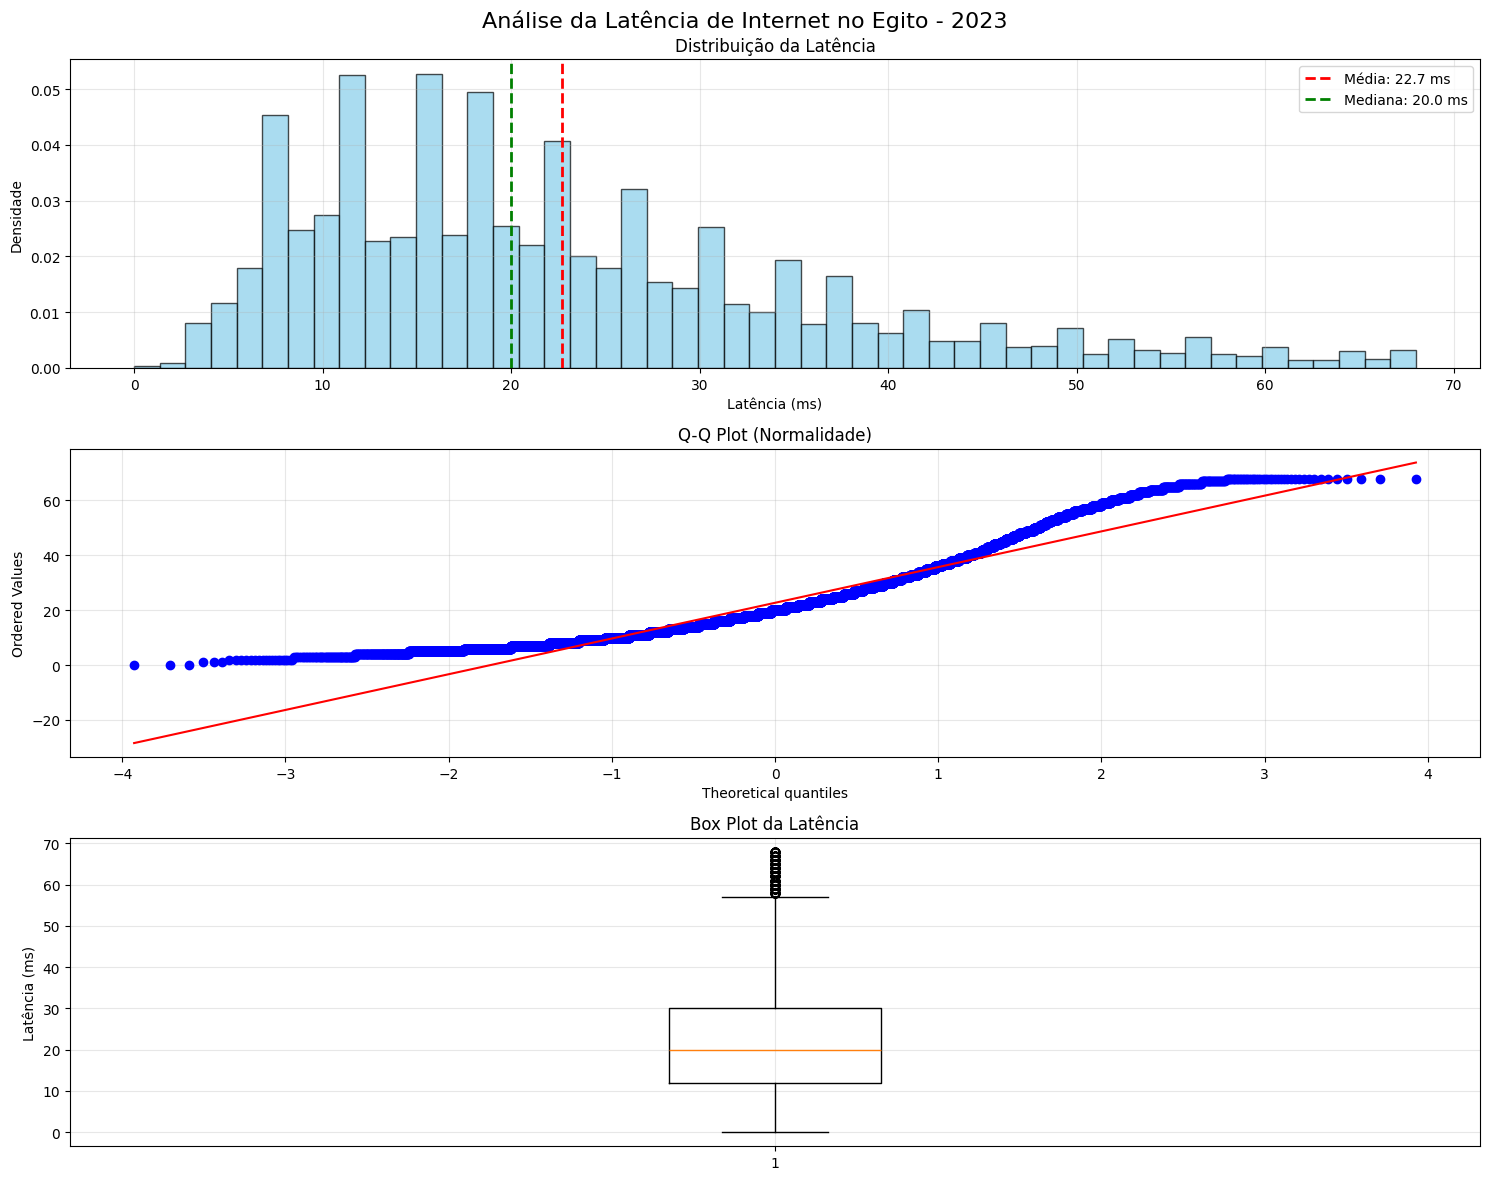

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(15,12))
fig.suptitle('Análise da Latência de Internet no Egito - 2023', fontsize=16)

# Histograma
axes[0].hist(lat_treat, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(media_amostral, color='red', linestyle='--', linewidth=2, label=f'Média: {media_amostral:.1f} ms')
axes[0].axvline(lat_treat.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {lat_treat.median():.1f} ms')
axes[0].set_xlabel('Latência (ms)')
axes[0].set_ylabel('Densidade')
axes[0].set_title('Distribuição da Latência')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(lat_treat, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normalidade)')
axes[1].grid(True, alpha=0.3)


# Box plot geral
axes[2].boxplot(lat_treat, vert=True)
axes[2].set_ylabel('Latência (ms)')
axes[2].set_title('Box Plot da Latência')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Teste de Hipóteses

Objetivo do Teste

Verificar se a latência média de internet no Egito é significativamente menor que 35 ms.

Hipóteses Definidas

* H₀ (Hipótese Nula): μ ≥ 35 ms (a latência média é maior ou igual a 35 ms)
* H₁ (Hipótese Alternativa): μ < 35 ms (a latência média é menor que 35 ms)
* Tipo de teste: Unilateral à esquerda

Dados da Amostra

* Tamanho da amostra: 16.157 observações
* Média amostral: 22,71 ms
* Desvio padrão: 13,57 ms
* Erro padrão: 0,107 ms



In [ ]:
from scipy.stats import t, norm

In [ ]:
mu_h0 = 35
print("media amostral: ", media_amostral)
t_calc =  ((media_amostral - mu_h0) / ep) #utlizando a media estimada por max verossimilhança
gl = n-1
print("Graus de linberdade de t student: ", gl)
print(f"O valor de T ou Z calculado é: {t_calc:.4f}")

alpha = 0.05
t_critico = t.ppf((alpha), gl)
p_valor =t.cdf(t_calc, gl)
regiao_critica = f"t < {t_critico:.4f}"
print(f"Valor crítico (α = {alpha}, unilateral à esquerda): {t_critico:.4f}")
print(f"Região crítica: {regiao_critica}")
print(f"P-valor: {p_valor:.6f}")

# Critério de Rejeição de H0 para teste unilateral à esquerda:
# Rejeitamos H0 se t_calc < t_critico
rejeita_h0 = t_calc < t_critico
rejeita_h0_pvalor = p_valor < alpha

media amostral:  22.708052237420315
Graus de linberdade de t student:  16156
O valor de T ou Z calculado é: -115.1377
Valor crítico (α = 0.05, unilateral à esquerda): -1.6449
Região crítica: t < -1.6449
P-valor: 0.000000


In [ ]:
print(f"Critério do valor crítico:")
if rejeita_h0:
  print(f"✗ |t_calc| = {abs(t_calc):.4f} está na região crítica")
  print(f"✗ REJEITAMOS H₀, pois é Menor que {mu_h0}")
else:
  print(f"✓ |t_calc| = {abs(t_calc):.4f} NÃO está na região crítica")
  print(f"✓ NÃO REJEITAMOS H₀, não há evidências suficientes")

print(f"\nCritério do p-valor:")
if rejeita_h0_pvalor:
  print(f"✗ p-valor = {p_valor:.6f} < α = {alpha}")
  print(f"✗ REJEITAMOS H₀")
else:
  print(f"✓ p-valor = {p_valor:.6f} ≥ α = {alpha}")
  print(f"✓ NÃO REJEITAMOS H₀")

Critério do valor crítico:
✗ |t_calc| = 115.1377 está na região crítica
✗ REJEITAMOS H₀, pois é Menor que 35

Critério do p-valor:
✗ p-valor = 0.000000 < α = 0.05
✗ REJEITAMOS H₀


In [ ]:
  t_ic = t.ppf(1 - alpha/2, gl)
  margem_erro = t_ic * ep
  ic_inf = media_amostral - margem_erro
  ic_sup = media_amostral + margem_erro

  if mu_h0 >= ic_inf and mu_h0 <= ic_sup:
        print(f"✓ μ₀ = {mu_h0} ESTÁ dentro do IC → Consistente com não rejeição de H₀")
  else:
        print(f"✗ μ₀ = {mu_h0} NÃO ESTÁ dentro do IC → Consistente com rejeição de H₀")


✗ μ₀ = 35 NÃO ESTÁ dentro do IC → Consistente com rejeição de H₀


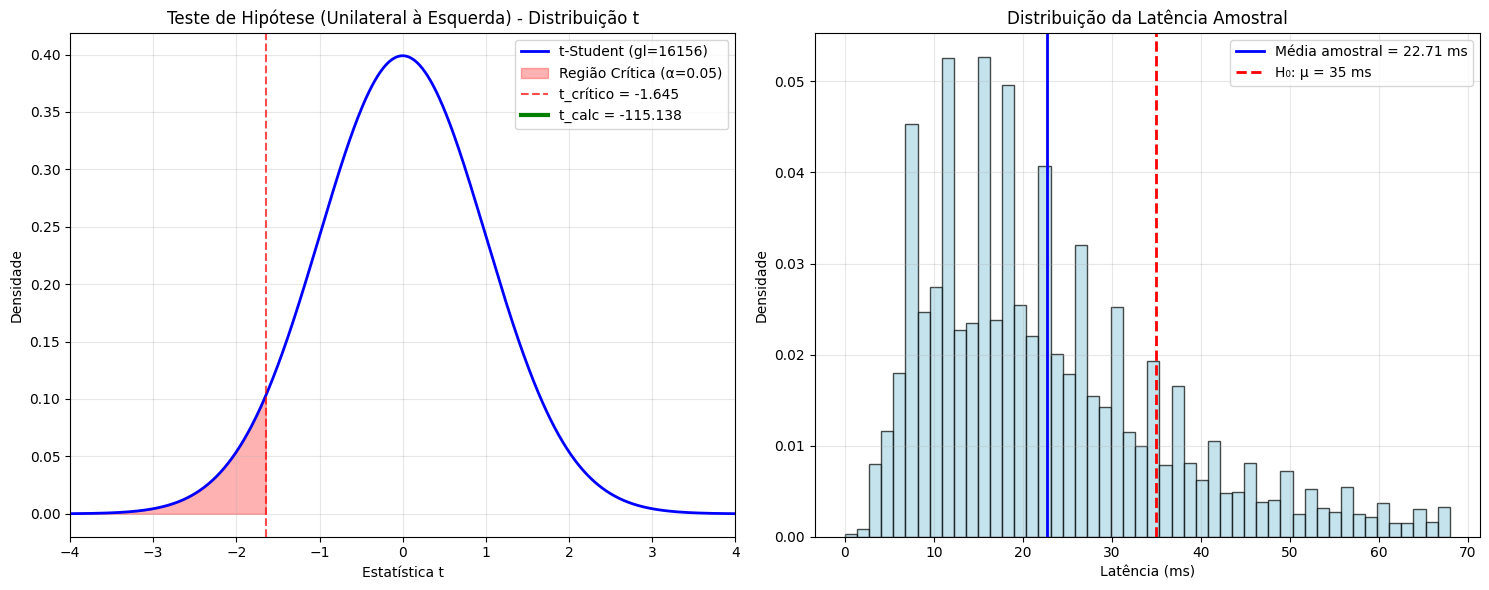

Estatística t: -115.1377
Valor crítico: -1.6449
P-valor: 0.000000
✗ NÃO REJEITAMOS H₀


In [ ]:
# --- Geração dos Gráficos ---
x_t = np.linspace(-4, 4, 1000) # Ajustado o limite para melhor visualização da cauda esquerda
y_t = t.pdf(x_t, gl)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Correção do valor crítico para teste unilateral à esquerda
ax1.plot(x_t, y_t, 'b-', linewidth=2, label=f't-Student (gl={gl})')

# Região Crítica: valores MENORES ou IGUAIS ao t_critico
x_crit = x_t[x_t <= t_critico] # CORRIGIDO: <= t_critico
ax1.fill_between(x_crit, t.pdf(x_crit, gl), alpha=0.3, color='red',
                 label=f'Região Crítica (α={alpha})')
ax1.axvline(t_critico, color='red', linestyle='--', alpha=0.7,
            label=f't_crítico = {t_critico:.3f}')
ax1.axvline(t_calc, color='green', linewidth=3, label=f't_calc = {t_calc:.3f}')

ax1.set_xlabel('Estatística t')
ax1.set_ylabel('Densidade')
ax1.set_title('Teste de Hipótese (Unilateral à Esquerda) - Distribuição t')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(x_t.min(), x_t.max()) # Usar os limites definidos para x_t

# Gráfico 2: Distribuição da amostra com valores de referência
ax2.hist(lat_treat, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
ax2.axvline(media_amostral, color='blue', linewidth=2,
            label=f'Média amostral = {media_amostral:.2f} ms')
ax2.axvline(mu_h0, color='red', linewidth=2, linestyle='--',
            label=f'H₀: μ = {mu_h0} ms')
ax2.set_xlabel('Latência (ms)')
ax2.set_ylabel('Densidade')
ax2.set_title('Distribuição da Latência Amostral')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resultado do teste
print(f"Estatística t: {t_calc:.4f}")
print(f"Valor crítico: {t_critico:.4f}")
print(f"P-valor: {p_valor:.6f}")

if t_calc > t_critico:
    print("✓ REJEITAMOS H₀")
else:
    print("✗ NÃO REJEITAMOS H₀")


Decisão Estatística

* Critério do valor crítico: |-115,14| > 1,64 → REJEITAMOS H₀

* Critério do p-valor: p < 0,05 → REJEITAMOS H₀

* Intervalo de confiança: [22,70; 22,71] → 35 ms está FORA do intervalo

Conclusão Prática

 Há evidência estatística muito forte de que a latência média de internet no Egito é significativamente menor que 35 ms.
Com 95% de confiança, podemos afirmar que a latência média populacional está entre 22,70 e 22,71 ms, valor bem abaixo dos 35 ms testados.

### **Modelos de Regressão**


Utilizando uma matriz de correlação para definir quais variaveis são favoráveis para a regressão linear

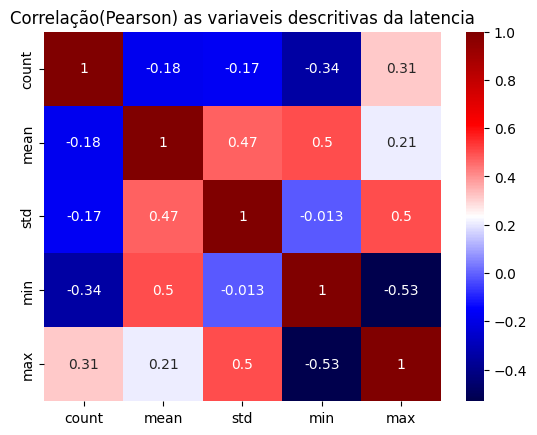

In [ ]:
corr_lat = stats_cidade[['count', 'mean', 'std', 'min', 'max']].corr()
# Plota a grafico

sns.heatmap(corr_lat, annot=True, cmap='seismic')
plt.title('Correlação(Pearson) as variaveis descritivas da latencia')
plt.show()

Pelo gráfico acima, podemos notar que as variávies media e desvio padrão possuem uma correlação moderada positiva indicando que cidades com média de latência maior tendem a ter mais variabilidade.

Um maior máximo costuma indicar um menor mínimo.

Realizando a Regressão Linear Simples para Media e Desvio Padrão

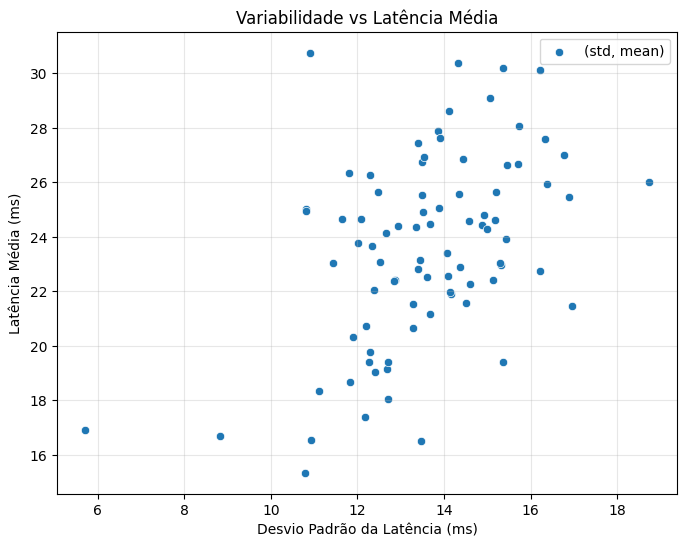

In [ ]:
#plotando o gráfico de dispersão da Media x STD
dados = stats_cidade[['std', 'mean']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.xlabel('Desvio Padrão da Latência (ms)')
plt.ylabel('Latência Média (ms)')
plt.title('Variabilidade vs Latência Média')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

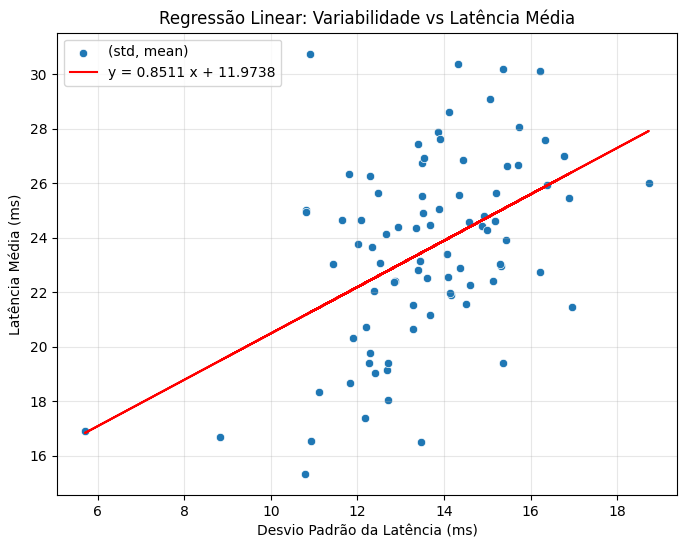

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Dados
x = dados['std'].values.reshape(-1, 1)
y = dados['mean'].values

# Regressão
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.plot(dados['std'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.xlabel('Desvio Padrão da Latência (ms)')
plt.ylabel('Latência Média (ms)')
plt.title('Regressão Linear: Variabilidade vs Latência Média')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


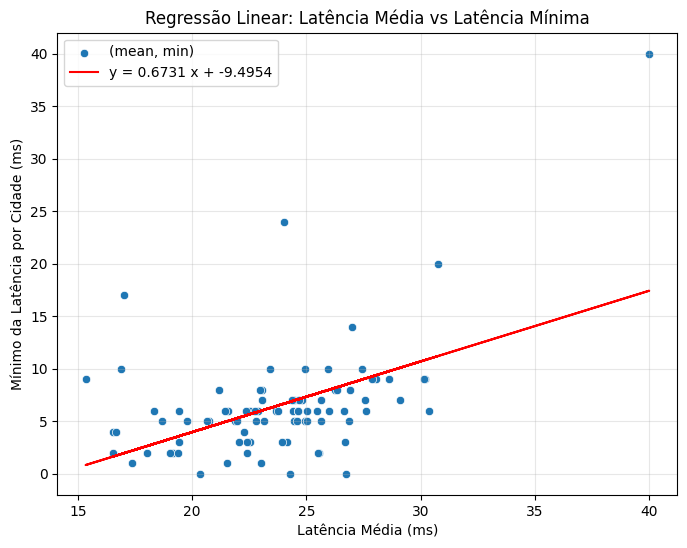

0.6731x + -9.4954


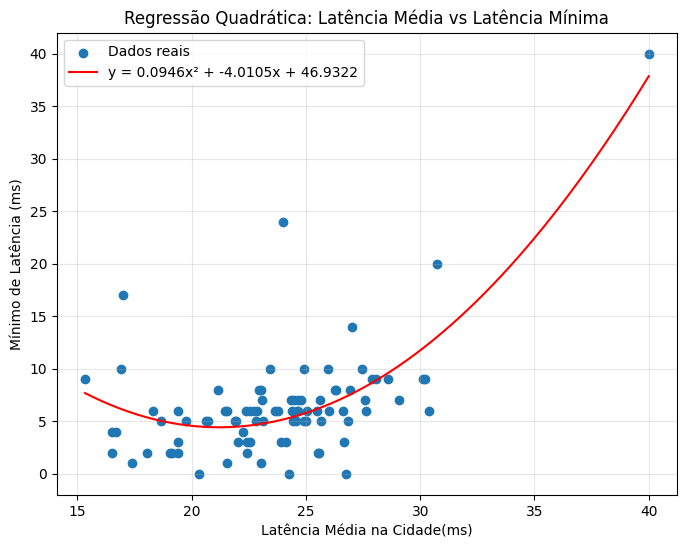

0.0946x^2 + -4.0105x + 46.9322
Ponto mínimo da equação: x = 21.1991

R² linear: 0.2476
R² quad: 0.5436


In [ ]:
#Latencia média e mínima

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


dados = stats_cidade[['mean', 'min']].dropna()

# Dados
x = dados['mean'].values.reshape(-1, 1)
y = dados['min'].values

# Regressão
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['mean'], y=dados['min'], label='(mean, min)')
plt.plot(dados['mean'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('Mínimo da Latência por Cidade (ms)')
plt.xlabel('Latência Média (ms)')
plt.title('Regressão Linear: Latência Média vs Latência Mínima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['min'].values

# Ajuste polinomial de grau 2 (quadrático)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}')
plt.ylabel('Mínimo de Latência (ms)')
plt.xlabel('Latência Média na Cidade(ms)')
plt.title('Regressão Quadrática: Latência Média vs Latência Mínima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadrático (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predições do modelo
y_pred = a * x**2 + b * x + c

# Média dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos resíduos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto mínimo da equação: x = {x_min:.4f}\n")

print(f"R² linear: {r1:.4f}")
print(f"R² quad: {r2_manual:.4f}")

**Sobre a equação linear:**

Interpretação da equação:
- Intercepto (-9.4040): Latência mínima quando média = 0. Como a latência mínima obrigatoriamente é 0 quando a média é 0, essa parte não tem significado real.
- Coeficiente (0.6690): Para cada 1ms de aumento na média,
  a latência mínima aumenta 0,669ms em média
- Relação POSITIVA: maior variabilidade → maior latência média

R² = 2517 significa que:
- Apenas 25,17% da variação da latência média é explicada pelo desvio padrão
- 74,83% da variação se deve a outros fatores não considerados
- Correlação é FRACA a MODERADA
- O modelo tem baixo poder preditivo

**Sobre a equação quadrática:**

Interpretação da equação:
- Cte (45.6811): Latência mínima quando média = 0. Como a latência mínima obrigatoriamente é 0 quando a média é 0, essa parte não tem significado real.
- Coeficiente linear: (-3.9245)
- Coeficiente quadrático: (0.0932)

- Após (x = 21.0635) - Relação POSITIVA : maior variabilidade → maior latência média quand
- Antes de (x = 21.0635) - Relação NEGATIVA : maior variabilidade → menor latência média quand

R² = 0.5432 significa que:
- Significantes 54,32% da variação da latência mínima é explicada pelo aumento da média
- 45,68% da variação se deve a outros fatores não considerados
- Correlação é MODERADA
- O modelo tem baixo poder mediano

In [ ]:
# Métricas adicionais
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"Erro Quadrático Médio (RMSE): {rmse:.3f} ms")
print(f"Erro Absoluto Médio (MAE): {mae:.3f} ms")
print(f"Erro médio representa {(mae/y.mean())*100:.1f}% da média")


Erro Quadrático Médio (RMSE): 3.557 ms
Erro Absoluto Médio (MAE): 2.410 ms
Erro médio representa 37.5% da média


Este modelo quadratico é significativamente mais adaptado, além de visualmente mais coesivo.

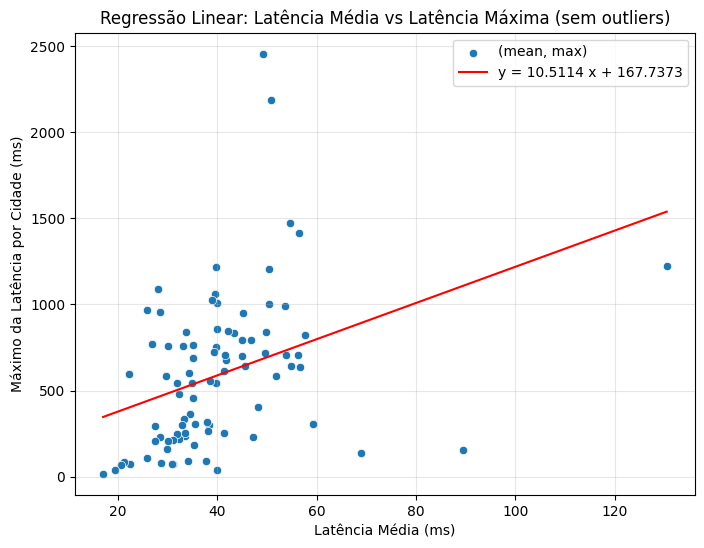

10.5114x + 167.7373


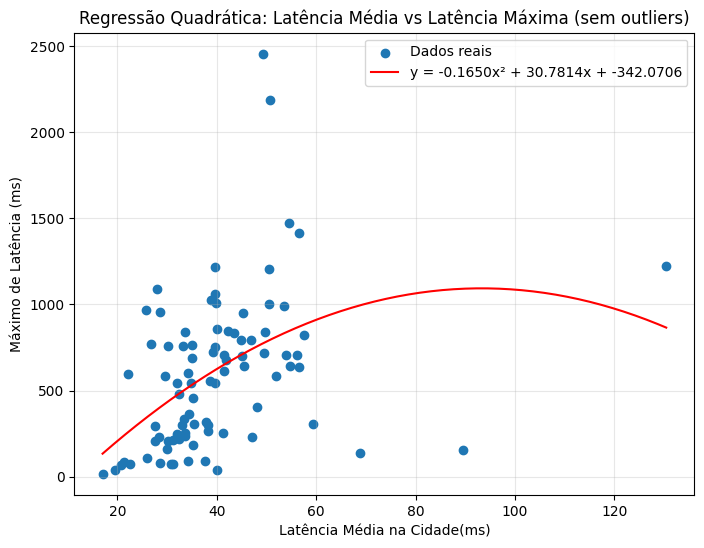

-0.1650x^2 + 30.7814x + -342.0706
Ponto mínimo da equação: x = 93.2794

R² linear: 0.1293
R² quad: 0.1842


In [ ]:
# Max e Mean


dados = lat_city[['mean', 'max']].dropna()

# Dados
x = dados['mean'].values.reshape(-1, 1)
y = dados['max'].values

# Regressão
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['mean'], y=dados['max'], label='(mean, max)')
plt.plot(dados['mean'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('Máximo da Latência por Cidade (ms)')
plt.xlabel('Latência Média (ms)')
plt.title('Regressão Linear: Latência Média vs Latência Máxima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['max'].values

# Ajuste polinomial de grau 2 (quadrático)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}')
plt.ylabel('Máximo de Latência (ms)')
plt.xlabel('Latência Média na Cidade(ms)')
plt.title('Regressão Quadrática: Latência Média vs Latência Máxima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadrático (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predições do modelo
y_pred = a * x**2 + b * x + c

# Média dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos resíduos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto mínimo da equação: x = {x_min:.4f}\n")

print(f"R² linear: {r1:.4f}")
print(f"R² quad: {r2_manual:.4f}")


O valor da linear de R^2 é muito baixo (R^2 < 0.1) e demonstra que não é nada preditivo. Na quadrática há um aumento para 0.25, mas ainda é uma relação de fraca a moderada.

Portanto, a regressão com dados sem outliers não é confiável e não pode ser feito com o máximo. Isso é fácilmente explicado visualizando o boxplot de latências com outliers original. Uma grande parte dos máximos foi excluida, e há um corte abrupto de qualquer máximo após certa faixa.

In [ ]:
latencia_media_por_cidade

,avg_lat_ms
city,
Ra’s Ghārib,130.454545
Rosetta,89.500000
Al Qūşīyah,68.857143
Qufādah,59.342857
Banī ‘Ubayd,57.600000
...,...
Madīnat as Sādis min Uktūbar,22.182320
Sidmant al Jabal,21.238095
Qaşr al Farāfirah,20.692308


In [ ]:
# Max e Mean

stats_cidade_com_outlier = {
    'Media' : latencia.mean(),
    'Mediana': latencia.median(),
    'Desvio Padrão': latencia.std(),
    'Variância': latencia.var(),
    'Mínimo': latencia.min(),
    'Máximo': latencia.max(),
    'Amplitude': latencia.max() - latencia.min(),
    'Coef. Variação': (latencia.std() / latencia.mean()) * 100
}

dados = latencia[['Media', 'Máximo']].dropna()


# Dados
x = dados['Media'].values.reshape(-1, 1)
y = dados['Máximo'].values

# Regressão
modelo = LinearRegression().fit(x, y)
y_pred = modelo.predict(x)
a = modelo.coef_[0]
b = modelo.intercept_
r1 = modelo.score(x,y)


# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['Media'], y=dados['Máximo'], label='(Media, Máximo)')
plt.plot(dados['Media'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.ylabel('Máximo da Latência por Cidade (ms)')
plt.xlabel('Latência Média (ms)')
plt.title('Regressão Linear: Latência Média vs Latência Máxima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"{a:.4f}x + {b:.4f}")

# Dados
x = dados['mean'].values
y = dados['Máximo'].values

# Ajuste polinomial de grau 2 (quadrático)
coefs = np.polyfit(x, y, 2)  # grau 2
a, b, c = coefs

# Gerar valores de x ordenados e y previstos
x_seq = np.linspace(min(x), max(x), 200)
y_pred = a * x_seq**2 + b * x_seq + c

# Plottar
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Dados reais')
plt.plot(x_seq, y_pred, color='red', label=f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}')
plt.ylabel('Máximo de Latência (ms)')
plt.xlabel('Latência Média na Cidade(ms)')
plt.title('Regressão Quadrática: Latência Média vs Latência Máxima (sem outliers)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Ajuste do modelo quadrático (grau 2)
coefs = np.polyfit(x, y, 2)
a, b, c = coefs

# Predições do modelo
y_pred = a * x**2 + b * x + c

# Média dos valores reais
y_mean = np.mean(y)

# Soma dos quadrados dos resíduos (SS_res)
ss_res = np.sum((y - y_pred)**2)

# Soma total dos quadrados (SS_tot)
ss_tot = np.sum((y - y_mean)**2)

# R2 manual
r2_manual = 1 - (ss_res / ss_tot)

x_min = (-b/(2*a))

print(f"{a:.4f}x^2 + {b:.4f}x + {c:.4f}")
print(f"Ponto mínimo da equação: x = {x_min:.4f}\n")

print(f"R² linear: {r1:.4f}")
print(f"R² quad: {r2_manual:.4f}")


KeyError: "None of [Index(['Media', 'Máximo'], dtype='object')] are in the [index]"

In [ ]:
##print(f"a reta é dada por: y = {a:.4f} x +{b:.4f}")
##print(f"com coeficiente de determinação (R): {r1:.4f}")


In [ ]:
# Features (X)
X = df[['avg_d_kbps', 'avg_u_kbps', 'tests', 'devices', 'centroid_lat', 'centroid_lon']]

# Target (Y)
y = df['avg_lat_ms']

# Modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
y_pred = model.predict

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dados['std'], y=dados['mean'], label='(std, mean)')
plt.plot(dados['std'], y_pred, color='red', label=f"y = {a:.4f} x + {b:.4f}")
plt.grid(True, alpha=0.3)
plt.show()

KeyError: 'std'

<Figure size 800x600 with 0 Axes>

Vou refazer essa parte

In [ ]:
#Variavies
x = df_sem_outliers[['avg_d_kbps', 'avg_u_kbps', 'tests', 'devices', 'centroid_lat', 'centroid_lon']]
y = df_sem_outliers['avg_lat_ms']

In [ ]:
import statsmodels.api as sm
#adicionando um termo de interceptação(cte) à matriz de features(X)
x_sm = sm.add_constant(x)

#usando Minimos Quadrados
model = sm.OLS(y, x_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_lat_ms   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     298.9
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:19:57   Log-Likelihood:                -64210.
No. Observations:               16157   AIC:                         1.284e+05
Df Residuals:                   16150   BIC:                         1.285e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.2688      8.216      1.737   

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

std — R²: 0.2231, RMSE: 3.049 ms
count — R²: 0.0327, RMSE: 3.828 ms
cv — R²: 0.2830, RMSE: 2.929 ms
iqr — R²: 0.0286, RMSE: 3.836 ms


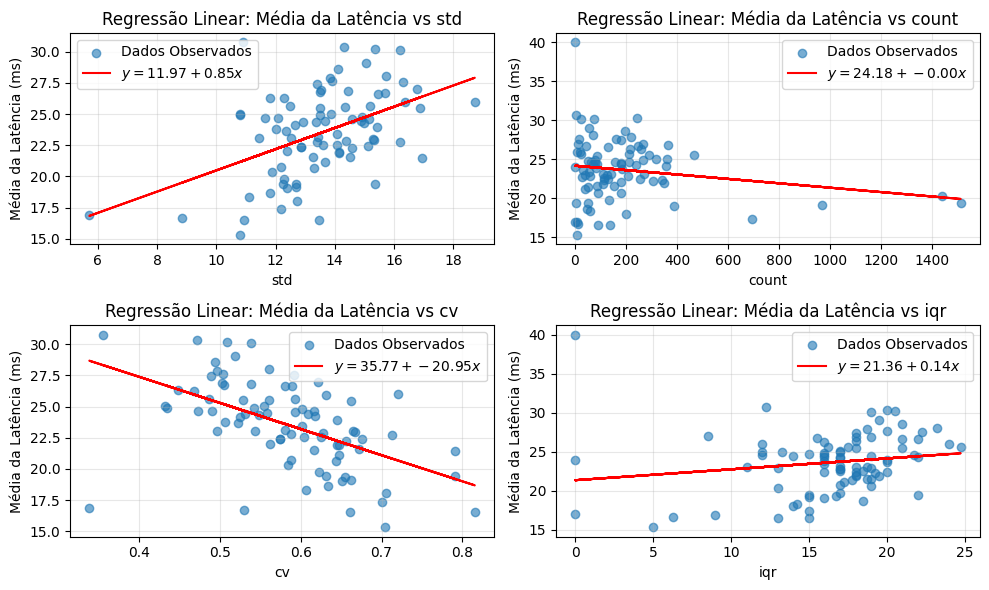

In [ ]:
def regressao_per_categ(nome):
    # Seleção das variáveis
    X = stats_cidade[[nome]].dropna()
    y = stats_cidade.loc[X.index, 'mean']  # Y correspondente

    # Modelo
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previsões
    y_pred = modelo.predict(X)

    # Avaliação
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Coeficientes
    coeficientes = pd.Series(modelo.coef_, index=X.columns)
    intercepto = modelo.intercept_

    return intercepto, coeficientes, r2, rmse, y_pred, y, X

def plotar(ax, x, y, y_pred, intercepto, coeficientes, r2, rmse, nome):
    ax.scatter(x[nome], y, alpha=0.6, label='Dados Observados')
    ax.plot(x[nome], y_pred, color='red', label=f'$y = {intercepto:.2f} + {coeficientes[nome]:.2f}x$')
    ax.set_xlabel(nome)
    ax.set_ylabel('Média da Latência (ms)')
    ax.set_title(f'Regressão Linear: Média da Latência vs {nome}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Você pode imprimir os resultados fora se preferir:
    print(f"{nome} — R²: {r2:.4f}, RMSE: {rmse:.3f} ms")

# Criar figura com 4 subplots lado a lado
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()
categ = ['std', 'count', 'cv', 'iqr']

for ax, item in zip(axs, categ):
    i, c, r, rm, yp, yy, xx = regressao_per_categ(item)
    plotar(ax, xx, yy, yp, i, c, r, rm, item)

plt.tight_layout()
plt.show()


 Regressão Linear Múltipla: Média da Latência
Equação: y = 23.07 + 1.71·std + 0.00·count + -38.75·cv + -0.01·iqr
R²: 0.9662
RMSE: 0.636 ms


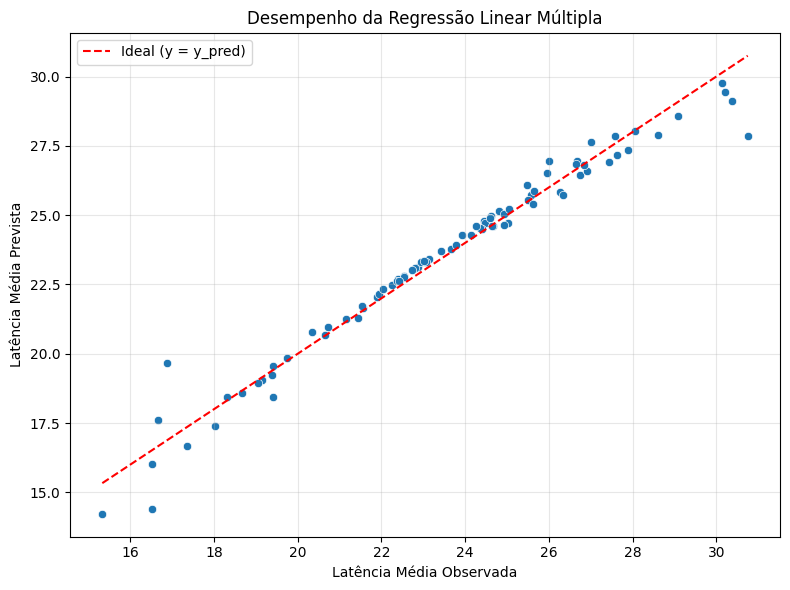

In [ ]:
# Seleção das variáveis (ajuste conforme seu DataFrame)
X = stats_cidade[['std', 'count', 'cv', 'iqr']].dropna()
y = stats_cidade.loc[X.index, 'mean']  # Y correspondente

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Previsões
y_pred = modelo.predict(X)

# Avaliação
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)
intercepto = modelo.intercept_

# Exibe resultados
print(" Regressão Linear Múltipla: Média da Latência")
print(f"Equação: y = {intercepto:.2f} + " + " + ".join([f"{coef:.2f}·{col}" for col, coef in coeficientes.items()]))
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.3f} ms")

# Opcional: Gráfico da predição vs real
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal (y = y_pred)')
plt.xlabel('Latência Média Observada')
plt.ylabel('Latência Média Prevista')
plt.title('Desempenho da Regressão Linear Múltipla')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### **ANOVA**

Objetivo: comparar as médias de três ou mais grupos (ou níveis de um fator) de uma variável quantitativa, para determinar se pelo menos uma dessas médias é estatisticamente diferente das outras


* Variabilidade Entre Grupos (Between-Group Variability): Reflete a diferença entre as médias dos grupos. Se as médias dos grupos são muito diferentes umas das outras, essa variabilidade será alta.

* Variabilidade Dentro dos Grupos (Within-Group Variability ou Erro): Reflete a variação natural dentro de cada grupo. É a variabilidade que não pode ser explicada pelas diferenças entre os grupos.

H_0 = a latência média é igual nas 3 regioes

H_1 =  pelo menos uma é diferente das demais

nivel de confiança = 5%

In [ ]:
#dataset com dados referente as cidade e latencia media
df_anova = df_sem_outliers[['city','avg_lat_ms']].dropna()

#categorizando city
df_anova['city'] = df_anova['city'].astype('category')

print("### DataFrame preparado para ANOVA (df_anova) ###")
print(df_anova.head())
print("\nVerificando tipos de dados:")
print(df_anova.dtypes)

### DataFrame preparado para ANOVA (df_anova) ###
                city  avg_lat_ms
0  Qaşr al Farāfirah           4
1  Qaşr al Farāfirah          17
2  Qaşr al Farāfirah          13
3  Qaşr al Farāfirah          14
4  Qaşr al Farāfirah          11

Verificando tipos de dados:
city          category
avg_lat_ms       int64
dtype: object


In [ ]:
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

In [ ]:
# Construir o modelo OLS para a ANOVA
# 'C(city)' informa ao statsmodels para tratar 'city' como uma variável categórica
modelo_anova = smf.ols('avg_lat_ms ~ C(city)', data=df_anova).fit()

# Realizar a Análise de Variância (ANOVA)
tabela_anova = anova_lm(modelo_anova, typ=2)

print("\n### Tabela de Resultados da ANOVA (Média da Latência por Cidade) ###")
print(tabela_anova.to_markdown(numalign="left", stralign="left"))


### Tabela de Resultados da ANOVA (Média da Latência por Cidade) ###
|          | sum_sq     | df    | F       | PR(>F)       |
|:---------|:-----------|:------|:--------|:-------------|
| C(city)  | 171197     | 86    | 11.4091 | 1.14673e-146 |
| Residual | 2.8039e+06 | 16070 | nan     | nan          |


In [ ]:
#dados descritivos
print("Número de cidades únicas:", df_anova['city'].nunique())
print("\nContagem de observações por cidade:")
print(df_anova['city'].value_counts())
print("\n")

Número de cidades únicas: 87

Contagem de observações por cidade:
city
Cairo                           1511
Al Khānkah                      1438
Al ‘Āshir min Ramaḑān            966
Madīnat as Sādis min Uktūbar     693
Bilbays                          467
                                ... 
Sawādah                            5
Al Qūşīyah                         4
Al Qays                            1
Maţāy                              1
Rosetta                            1
Name: count, Length: 87, dtype: int64




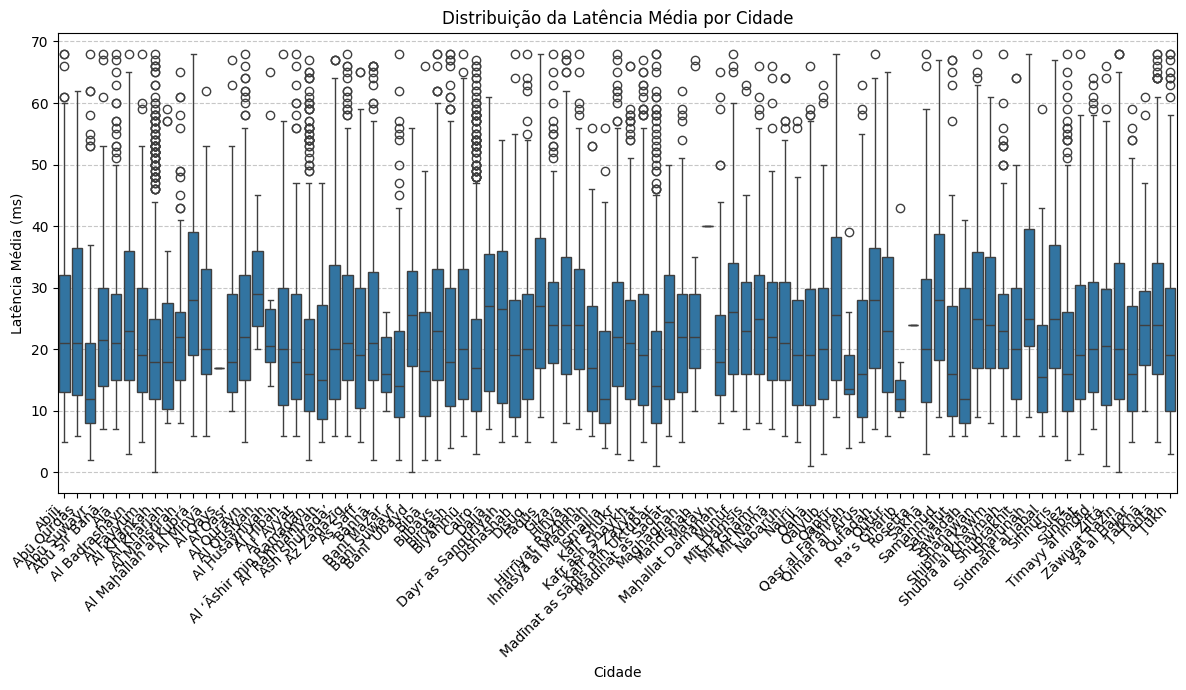

In [ ]:

# --- Visualização: Box Plot da Latência por Cidade ---
# Um box plot é excelente para visualizar a distribuição e as médias de grupos.
plt.figure(figsize=(12, 7))
sns.boxplot(x='city', y='avg_lat_ms', data=df_anova)
plt.title('Distribuição da Latência Média por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Latência Média (ms)')
plt.xticks(rotation=45, ha='right') # Rotacionar rótulos para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O nosso espaço possui 87 dimesnões, o que dificulta na visualização dos bloxplots e dados pro anova. Por isso, optou-se por dividir em 3 categorias - Norte, Central e Sul.

 #### Cortando na horizontal


Contagem de observações por região geográfica:
regiao_geografica
Regiao_Norte      15101
Regiao_Central      963
Regiao_Sul           93
Name: count, dtype: int64

### Tabela de Resultados da ANOVA (Latência por Região Geográfica) ###
|                      | sum_sq      | df    | F        | PR(>F)   |
|:---------------------|:------------|:------|:---------|:---------|
| C(regiao_geografica) | 244.606     | 2     | 0.664127 | 0.514737 |
| Residual             | 2.97485e+06 | 16154 | nan      | nan      |


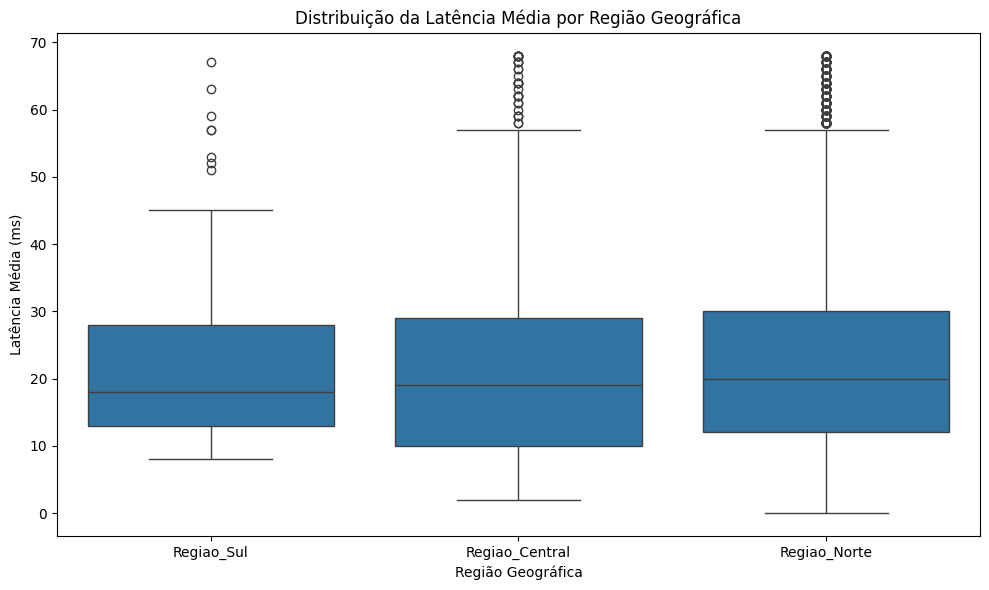


### Teste Post-Hoc de Tukey (Região Geográfica) ###
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
Regiao_Central Regiao_Norte   0.5048 0.5021 -0.5523  1.562  False
Regiao_Central   Regiao_Sul   0.0869 0.9981 -3.3671 3.5408  False
  Regiao_Norte   Regiao_Sul   -0.418 0.9528 -3.7264 2.8905  False
-----------------------------------------------------------------


In [ ]:
# Exemplo: Criando 3 regiões baseadas na latitude
#a distribuição da latitude
#print(df['centroid_lat'].describe())

# limites para as regiões (ajuste com base na sua análise descritiva)
# Ex: norte, central e oeste
lat_bins = pd.cut(df_sem_outliers['centroid_lat'], bins=3, labels=['Regiao_Sul', 'Regiao_Central', 'Regiao_Norte']) # Ajuste os labels
df_sem_outliers['regiao_geografica'] = lat_bins

#usando a 'regiao_geografica' na ANOVA
df_anova_regiao = df_sem_outliers[['avg_lat_ms', 'regiao_geografica']].dropna()
print("\nContagem de observações por região geográfica:")
print(df_anova_regiao['regiao_geografica'].value_counts())

if df_anova_regiao['regiao_geografica'].nunique() >= 2: # ANOVA precisa de pelo menos 2 grupos, mas geralmente 3+ é o objetivo
    modelo_anova_regiao = smf.ols('avg_lat_ms ~ C(regiao_geografica)', data=df_anova_regiao).fit()
    tabela_anova_regiao = anova_lm(modelo_anova_regiao, typ=2)
    print("\n### Tabela de Resultados da ANOVA (Latência por Região Geográfica) ###")
    print(tabela_anova_regiao.to_markdown(numalign="left", stralign="left"))

    # Plot da Latência por Região
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='regiao_geografica', y='avg_lat_ms', data=df_anova_regiao)
    plt.title('Distribuição da Latência Média por Região Geográfica')
    plt.xlabel('Região Geográfica')
    plt.ylabel('Latência Média (ms)')
    plt.tight_layout()
    plt.show()

    # Se significativo, rode Tukey para regiões
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_regiao = pairwise_tukeyhsd(endog=df_anova_regiao['avg_lat_ms'], groups=df_anova_regiao['regiao_geografica'], alpha=0.05)
    print("\n### Teste Post-Hoc de Tukey (Região Geográfica) ###")
    print(tukey_result_regiao.summary().as_text())
else:
    print("Não há grupos suficientes em 'regiao_geografica' para ANOVA.")


* df (Graus de Liberdade): Número de categorias de cidades menos 1.
* sum_sq (Soma dos Quadrados): Representa a variação explicada pelas diferenças entre as cidades.
mean_sq (Quadrado Médio): É a soma dos quadrados dividida pelos graus de liberdade.
* F (Estatística F): O valor da estatística F. Um F grande sugere que há diferenças significativas entre as médias das cidades.
* PR(>F) (P-valor): Este é o valor mais importante.
  * Se PR(>F) for menor que o seu nível de significância (geralmente 0.05): Você rejeita a hipótese nula. Isso significa que há evidências estatísticas de que a latência média é significativamente diferente em pelo menos uma das cidades.
  * Se PR(>F) for maior ou igual a 0.05: Você não rejeita a hipótese nula. Isso significa que não há evidências suficientes para concluir que as latências médias são diferentes entre as cidades.

Comparando este p-valor com o nível de significância comum (alpha) de 0.05: 0.514737 > 0.05
Como o p-valor (0.514737) é maior que 0.05, você não rejeita a hipótese nula (H
0
​
 ).
Conclusão no Contexto do Problema:

Com base nesta análise, não há evidências estatísticas suficientes para concluir que existem diferenças significativas na latência média da rede entre as regiões geográficas (Norte, Central, Sul) no Egito, usando a categorização de latitude em 3 bins.
Em termos práticos, as variações na latência que você observa entre essas três regiões podem ser atribuídas ao acaso ou à variabilidade natural dos dados, e não a uma diferença real e consistente imposta pela região geográfica.
Implicacões:

Este resultado sugere que, para o seu modelo e a forma como as regiões foram definidas (divisão da latitude em 3 partes), a localização geográfica por si só (neste esquema de regiões) não é um fator determinante para as diferenças na latência média da rede no Egito.
Outros fatores não incluídos nesta ANOVA (como densidade populacional, tipo de infraestrutura específica em cada cidade, número de dispositivos conectados, ou até mesmo variações intra-regionais maiores) podem estar explicando a maior parte da variabilidade da latência.

#### cortando na vertical


Contagem de observações por região geográfica:
regiao_geografica
Regiao_Central    9844
Regiao_Oeste      6230
Regiao_Leste        83
Name: count, dtype: int64

### Tabela de Resultados da ANOVA (Latência por Região Geográfica) ###
|                      | sum_sq      | df    | F       | PR(>F)     |
|:---------------------|:------------|:------|:--------|:-----------|
| C(regiao_geografica) | 4689.94     | 2     | 12.7527 | 2.9238e-06 |
| Residual             | 2.97041e+06 | 16154 | nan     | nan        |


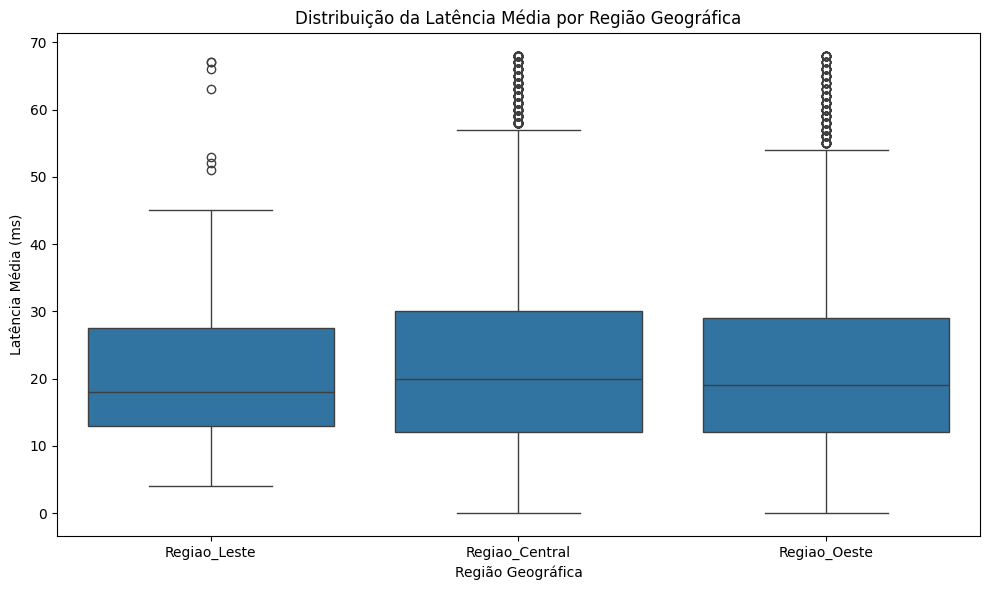


### Teste Post-Hoc de Tukey (Região Geográfica) ###
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
Regiao_Central Regiao_Leste  -0.1481 0.9946 -3.6515  3.3554  False
Regiao_Central Regiao_Oeste  -1.1079    0.0 -1.6225 -0.5934   True
  Regiao_Leste Regiao_Oeste  -0.9599 0.7977 -4.4718  2.5521  False
------------------------------------------------------------------


In [ ]:
# Exemplo: Criando 3 regiões baseadas na latitude
#a distribuição da latitude
#print(df['centroid_lon'].describe())

# limites para as regiões (ajuste com base na sua análise descritiva)
# Ex: norte, central e oeste
lat_bins = pd.cut(df_sem_outliers['centroid_lon'], bins=3, labels=['Regiao_Leste', 'Regiao_Central', 'Regiao_Oeste']) # Ajuste os labels
df_sem_outliers['regiao_geografica'] = lat_bins

#usando a 'regiao_geografica' na ANOVA
df_anova_regiaoV = df_sem_outliers[['avg_lat_ms', 'regiao_geografica']].dropna()
print("\nContagem de observações por região geográfica:")
print(df_anova_regiaoV['regiao_geografica'].value_counts())

if df_anova_regiaoV['regiao_geografica'].nunique() >= 2: # ANOVA precisa de pelo menos 2 grupos, mas geralmente 3+ é o objetivo
    modelo_anova_regiaoV = smf.ols('avg_lat_ms ~ C(regiao_geografica)', data=df_anova_regiaoV).fit()
    tabela_anova_regiao = anova_lm(modelo_anova_regiaoV, typ=2)
    print("\n### Tabela de Resultados da ANOVA (Latência por Região Geográfica) ###")
    print(tabela_anova_regiao.to_markdown(numalign="left", stralign="left"))

    # Plot da Latência por Região
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='regiao_geografica', y='avg_lat_ms', data=df_anova_regiaoV)
    plt.title('Distribuição da Latência Média por Região Geográfica')
    plt.xlabel('Região Geográfica')
    plt.ylabel('Latência Média (ms)')
    plt.tight_layout()
    plt.show()

    # Se significativo, rode Tukey para regiões
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result_regiao = pairwise_tukeyhsd(endog=df_anova_regiaoV['avg_lat_ms'], groups=df_anova_regiao['regiao_geografica'], alpha=0.05)
    print("\n### Teste Post-Hoc de Tukey (Região Geográfica) ###")
    print(tukey_result_regiao.summary().as_text())
else:
    print("Não há grupos suficientes em 'regiao_geografica' para ANOVA.")

Como pf (2.9238e-06) é muito menor que o nivel de confiança(0.05), então rejeitamos a hipotese nula, ou seja, a hipotese de que pelo menos uma das regioes possui latencia media diferente é verdadeira.

Ao contrário da divisão Norte-Sul, a divisão Leste-Oeste parece ter um impacto discernível na latência da rede. Isso pode ser devido a fatores como a concentração de infraestrutura de rede (cidades costeiras, proximidade de cabos submarinos no Leste, etc.), densidade populacional, ou tipos de terreno que afetam a implantação de rede.

o Teste de Tukey diz quais pares de médias de grupos são significativamente diferentes entre si
Interpretando os dados
* É a diferença entre a média do group1 e a média do group2 (
Xmdgroup1 − Xmdgroup2).
* Um valor negativo significa que a média do group1 é menor que a do group2.
* A magnitude do meandiff indica o tamanho da diferença observada

pvalor
* Se p-adj < 0.05 (ou seu nível de significância escolhido): Você rejeita a hipótese nula para este par. Isso significa que a diferença na latência média entre group1 e group2 é estatisticamente significativa.
* Se p-adj $\ge$ 0.05: Você não rejeita a hipótese nula para este par. Isso significa que não há evidências estatísticas de que a diferença na latência média entre group1 e group2 seja significativa.

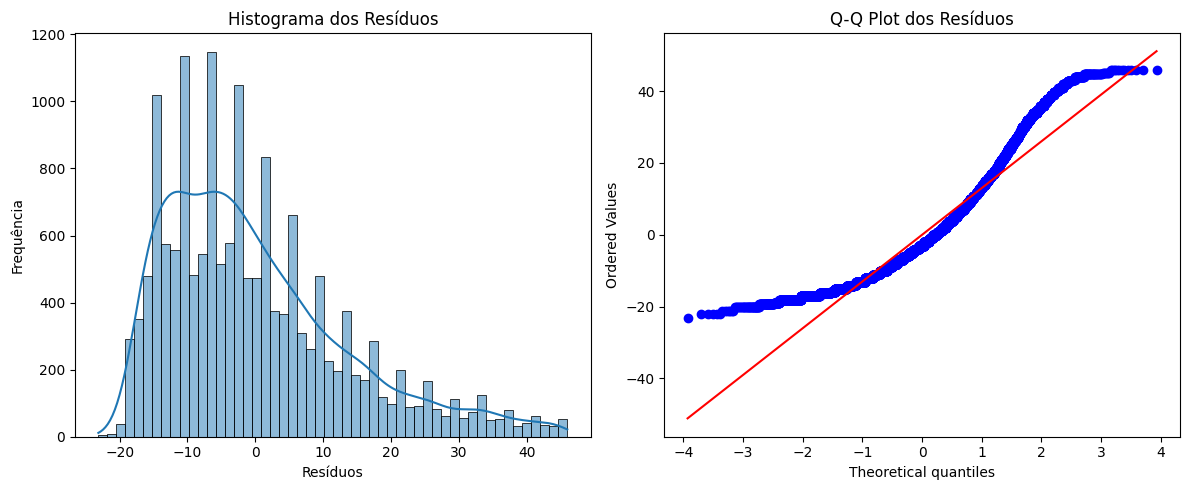


### Teste de Levene para Homogeneidade das Variâncias ###
Estatística de Levene: 10.4872
P-valor do Teste de Levene: 0.0000


In [ ]:
#Teste de Levene
residuos = modelo_anova_regiaoV.resid

# --- Verificação da Normalidade dos Resíduos ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.tight_layout()
plt.show()

# --- Verificação da Homogeneidade das Variâncias (Teste de Levene) ---
# As variâncias da latência em cada grupo (região) devem ser similares.
# O teste de Levene é robusto à não-normalidade.
# Precisamos dos dados de avg_lat_ms para cada grupo separadamente
grupos_latencia = [df_anova_regiao['avg_lat_ms'][df_anova_regiao['regiao_geografica'] == r].dropna()
                   for r in df_anova_regiao['regiao_geografica'].unique()]

# stats.levene(grupo1, grupo2, grupo3, ...)
# use *grupos_latencia para desempacotar a lista de arrays como argumentos separados
levene_statistic, levene_pvalue = stats.levene(*grupos_latencia, center='mean') # center='mean' ou 'median'

print(f"\n### Teste de Levene para Homogeneidade das Variâncias ###")
print(f"Estatística de Levene: {levene_statistic:.4f}")
print(f"P-valor do Teste de Levene: {levene_pvalue:.4f}")

# Interpretação do Teste de Levene:
# Se p-valor < 0.05: Rejeita H0, ou seja, as variâncias NÃO são homogêneas.
# Se p-valor >= 0.05: Não rejeita H0, ou seja, as variâncias são homogêneas.

### Teste de Independência QUI-QUADRADO

### Tabela de Contingência (Cidade vs. Categoria de Dispositivos) ###
| city                         | Poucos Dispositivos   | Muitos Dispositivos   |
|:-----------------------------|:----------------------|:----------------------|
| Abjīj                        | 135                   | 46                    |
| Abū Qurqāş                   | 8                     | 0                     |
| Abū Şuwayr                   | 115                   | 23                    |
| Abū Şīr Banā                 | 30                    | 20                    |
| Ajā                          | 99                    | 80                    |
| Al Badrashayn                | 100                   | 147                   |
| Al Fayyūm                    | 50                    | 59                    |
| Al Khānkah                   | 300                   | 1138                  |
| Al Khārjah                   | 28                    | 10                    |
| Al Manşūrah                  | 43    

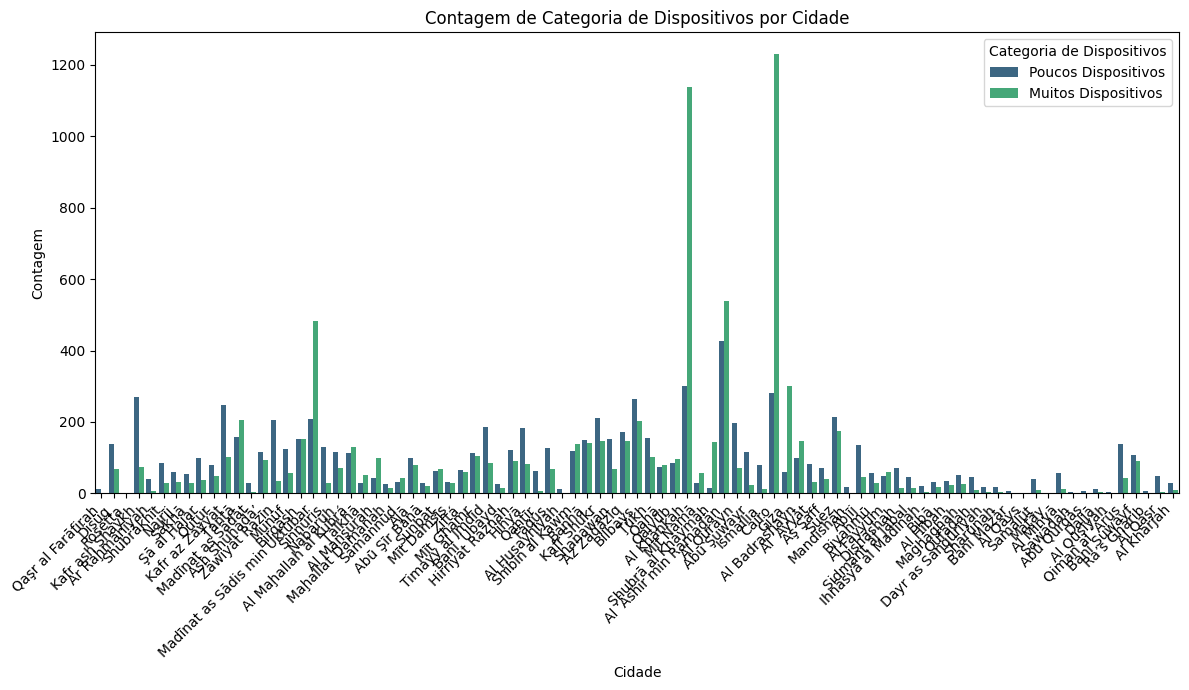

In [ ]:
from scipy.stats import chi2_contingency


# 1. Categorizar a variável 'devices'
# Vamos criar duas categorias: 'Poucos Dispositivos' e 'Muitos Dispositivos'
# O ponto de corte pode ser a mediana, a média, ou um valor que faça sentido para o negócio.
# Usarei a mediana como exemplo.

median_devices = df_sem_outliers['devices'].median()
df_sem_outliers['device_category'] = pd.cut(df_sem_outliers['devices'],
                               bins=[df_sem_outliers['devices'].min() - 1, median_devices, df_sem_outliers['devices'].max() + 1],
                               labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                               right=True # Intervalo inclui o lado direito
                              ).astype('category')

# Opcional: Se quiser 3 ou mais categorias, ajuste 'bins' e 'labels'.
# Por exemplo, para 3 categorias (Q1, Q2, Q3 para quartis):
# df_sem_outliers['device_category'] = pd.qcut(df['devices'], q=3, labels=['Baixo', 'Médio', 'Alto'], duplicates='drop').astype('category')


# 2. Criar a Tabela de Contingência
# Remova NaNs se houver, para garantir que todas as observações contribuam.
df_chi2 = df_sem_outliers[['city', 'device_category']].dropna()

contingency_table = pd.crosstab(df_chi2['city'], df_chi2['device_category'])

print("### Tabela de Contingência (Cidade vs. Categoria de Dispositivos) ###")
print(contingency_table.to_markdown(numalign="left", stralign="left"))
print("\n")

# 3. Executar o Teste Qui-Quadrado
# chi2: estatística Qui-Quadrado
# p: p-valor
# dof: graus de liberdade
# expected: frequências esperadas
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("### Resultados do Teste de Independência Qui-Quadrado ###")
print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

# Opcional: Mostrar as frequências esperadas
# print("\nFrequências Esperadas (se houver independência):")
# print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).to_markdown(numalign="left", stralign="left"))


# --- Interpretação dos Resultados ---
print("\n### Interpretação ###")
if p < 0.05: # Nível de significância comum
    print(f"Com um p-valor de {p:.4f} (menor que 0.05), rejeitamos a hipótese nula.")
    print("Isso significa que há uma associação estatisticamente significativa entre a cidade e a categoria de número de dispositivos.")
    print("A categoria de dispositivos não é independente da cidade.")
else:
    print(f"Com um p-valor de {p:.4f} (maior ou igual a 0.05), não rejeitamos a hipótese nula.")
    print("Isso significa que não há evidências estatísticas suficientes para afirmar uma associação entre a cidade e a categoria de número de dispositivos.")
    print("A categoria de dispositivos parece ser independente da cidade.")


# --- Visualização (Opcional: Gráfico de Barras Agrupadas ou de Contagem) ---
# Ajuda a visualizar as proporções dentro de cada grupo
plt.figure(figsize=(12, 7))
sns.countplot(x='city', hue='device_category', data=df_chi2, palette='viridis')
plt.title('Contagem de Categoria de Dispositivos por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria de Dispositivos')
plt.tight_layout()
plt.show()

### Tabela de Contingência (Cidade vs. Categoria de Dispositivos) ###
| city                         | Baixo   | Médio   | Alto   |
|:-----------------------------|:--------|:--------|:-------|
| Abjīj                        | 95      | 65      | 21     |
| Abū Qurqāş                   | 6       | 2       | 0      |
| Abū Şuwayr                   | 88      | 47      | 3      |
| Abū Şīr Banā                 | 20      | 26      | 4      |
| Ajā                          | 66      | 83      | 30     |
| Al Badrashayn                | 60      | 77      | 110    |
| Al Fayyūm                    | 32      | 25      | 52     |
| Al Khānkah                   | 195     | 261     | 982    |
| Al Khārjah                   | 0       | 35      | 3      |
| Al Manşūrah                  | 28      | 47      | 66     |
| Al Maḩallah al Kubrá         | 76      | 85      | 83     |
| Al Minyā                     | 43      | 24      | 2      |
| Al Qays                      | 1       | 0       | 0      |


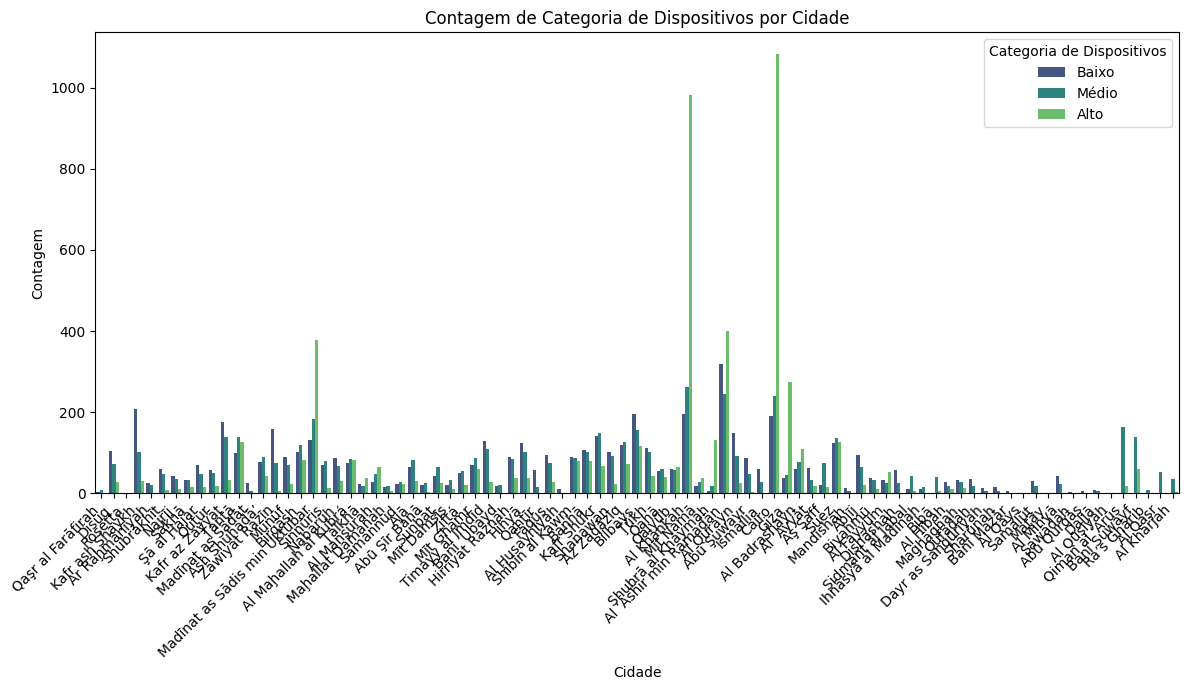

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Categorizar a variável 'devices'
# Usar a base df_sem_outliers consistentemente
df = df_sem_outliers.copy()

# Opção A: 2 categorias pela mediana
'''median_devices = df['devices'].median()
df['device_category'] = pd.cut(df['devices'],
                               bins=[df['devices'].min() - 1, median_devices, df['devices'].max() + 1],
                               labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                               right=True
                              ).astype('category')'''

# Opção B: (alternativa) 3 categorias por tercis — descomente se quiser usar essa
q_labels = ['Baixo', 'Médio', 'Alto']
try:
    df['device_category'] = pd.qcut(df['devices'].rank(method='first'), q=3, labels=q_labels).astype('category')
except ValueError as e:
    print(f"Erro ao criar categorias com qcut: {e}")
    df['device_category'] = pd.cut(df['devices'],
                                   bins=[df['devices'].min() - 1, median_devices, df['devices'].max() + 1],
                                   labels=['Poucos Dispositivos', 'Muitos Dispositivos'],
                                   right=True
                                  ).astype('category')

# 2. Criar a Tabela de Contingência
df_chi2 = df[['city', 'device_category']].dropna()
contingency_table = pd.crosstab(df_chi2['city'], df_chi2['device_category'])

print("### Tabela de Contingência (Cidade vs. Categoria de Dispositivos) ###")
print(contingency_table.to_markdown(numalign="left", stralign="left"))
print("\n")

# 3. Teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("### Resultados do Teste de Independência Qui-Quadrado ###")
print(f"Estatística Qui-Quadrado: {chi2:.4f}")
print(f"P-valor: {p:.4f}")
print(f"Graus de Liberdade (dof): {dof}")

# Interpretação
print("\n### Interpretação ###")
if p < 0.05:
    print("Rejeitamos a hipótese nula. Existe associação entre cidade e categoria de dispositivos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência de associação entre cidade e categoria de dispositivos.")

# 4. Visualização
plt.figure(figsize=(12, 7))
sns.countplot(x='city', hue='device_category', data=df_chi2, palette='viridis')
plt.title('Contagem de Categoria de Dispositivos por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoria de Dispositivos')
plt.tight_layout()
plt.show()


📊 Resultado do Teste Qui-Quadrado
Estatística Qui-Quadrado: 5099.81

Graus de liberdade: 172

P-valor: 0.0000

✅ Conclusão
Como o p-valor é menor que 0.05, rejeitamos a hipótese nula com segurança. Isso indica que:

Existe uma associação estatisticamente significativa entre a cidade e a categoria de número de dispositivos.

Ou seja, a distribuição dos dispositivos varia de forma não aleatória entre as cidades — algumas cidades têm uma concentração maior de usuários com muitos dispositivos, outras com poucos, etc.

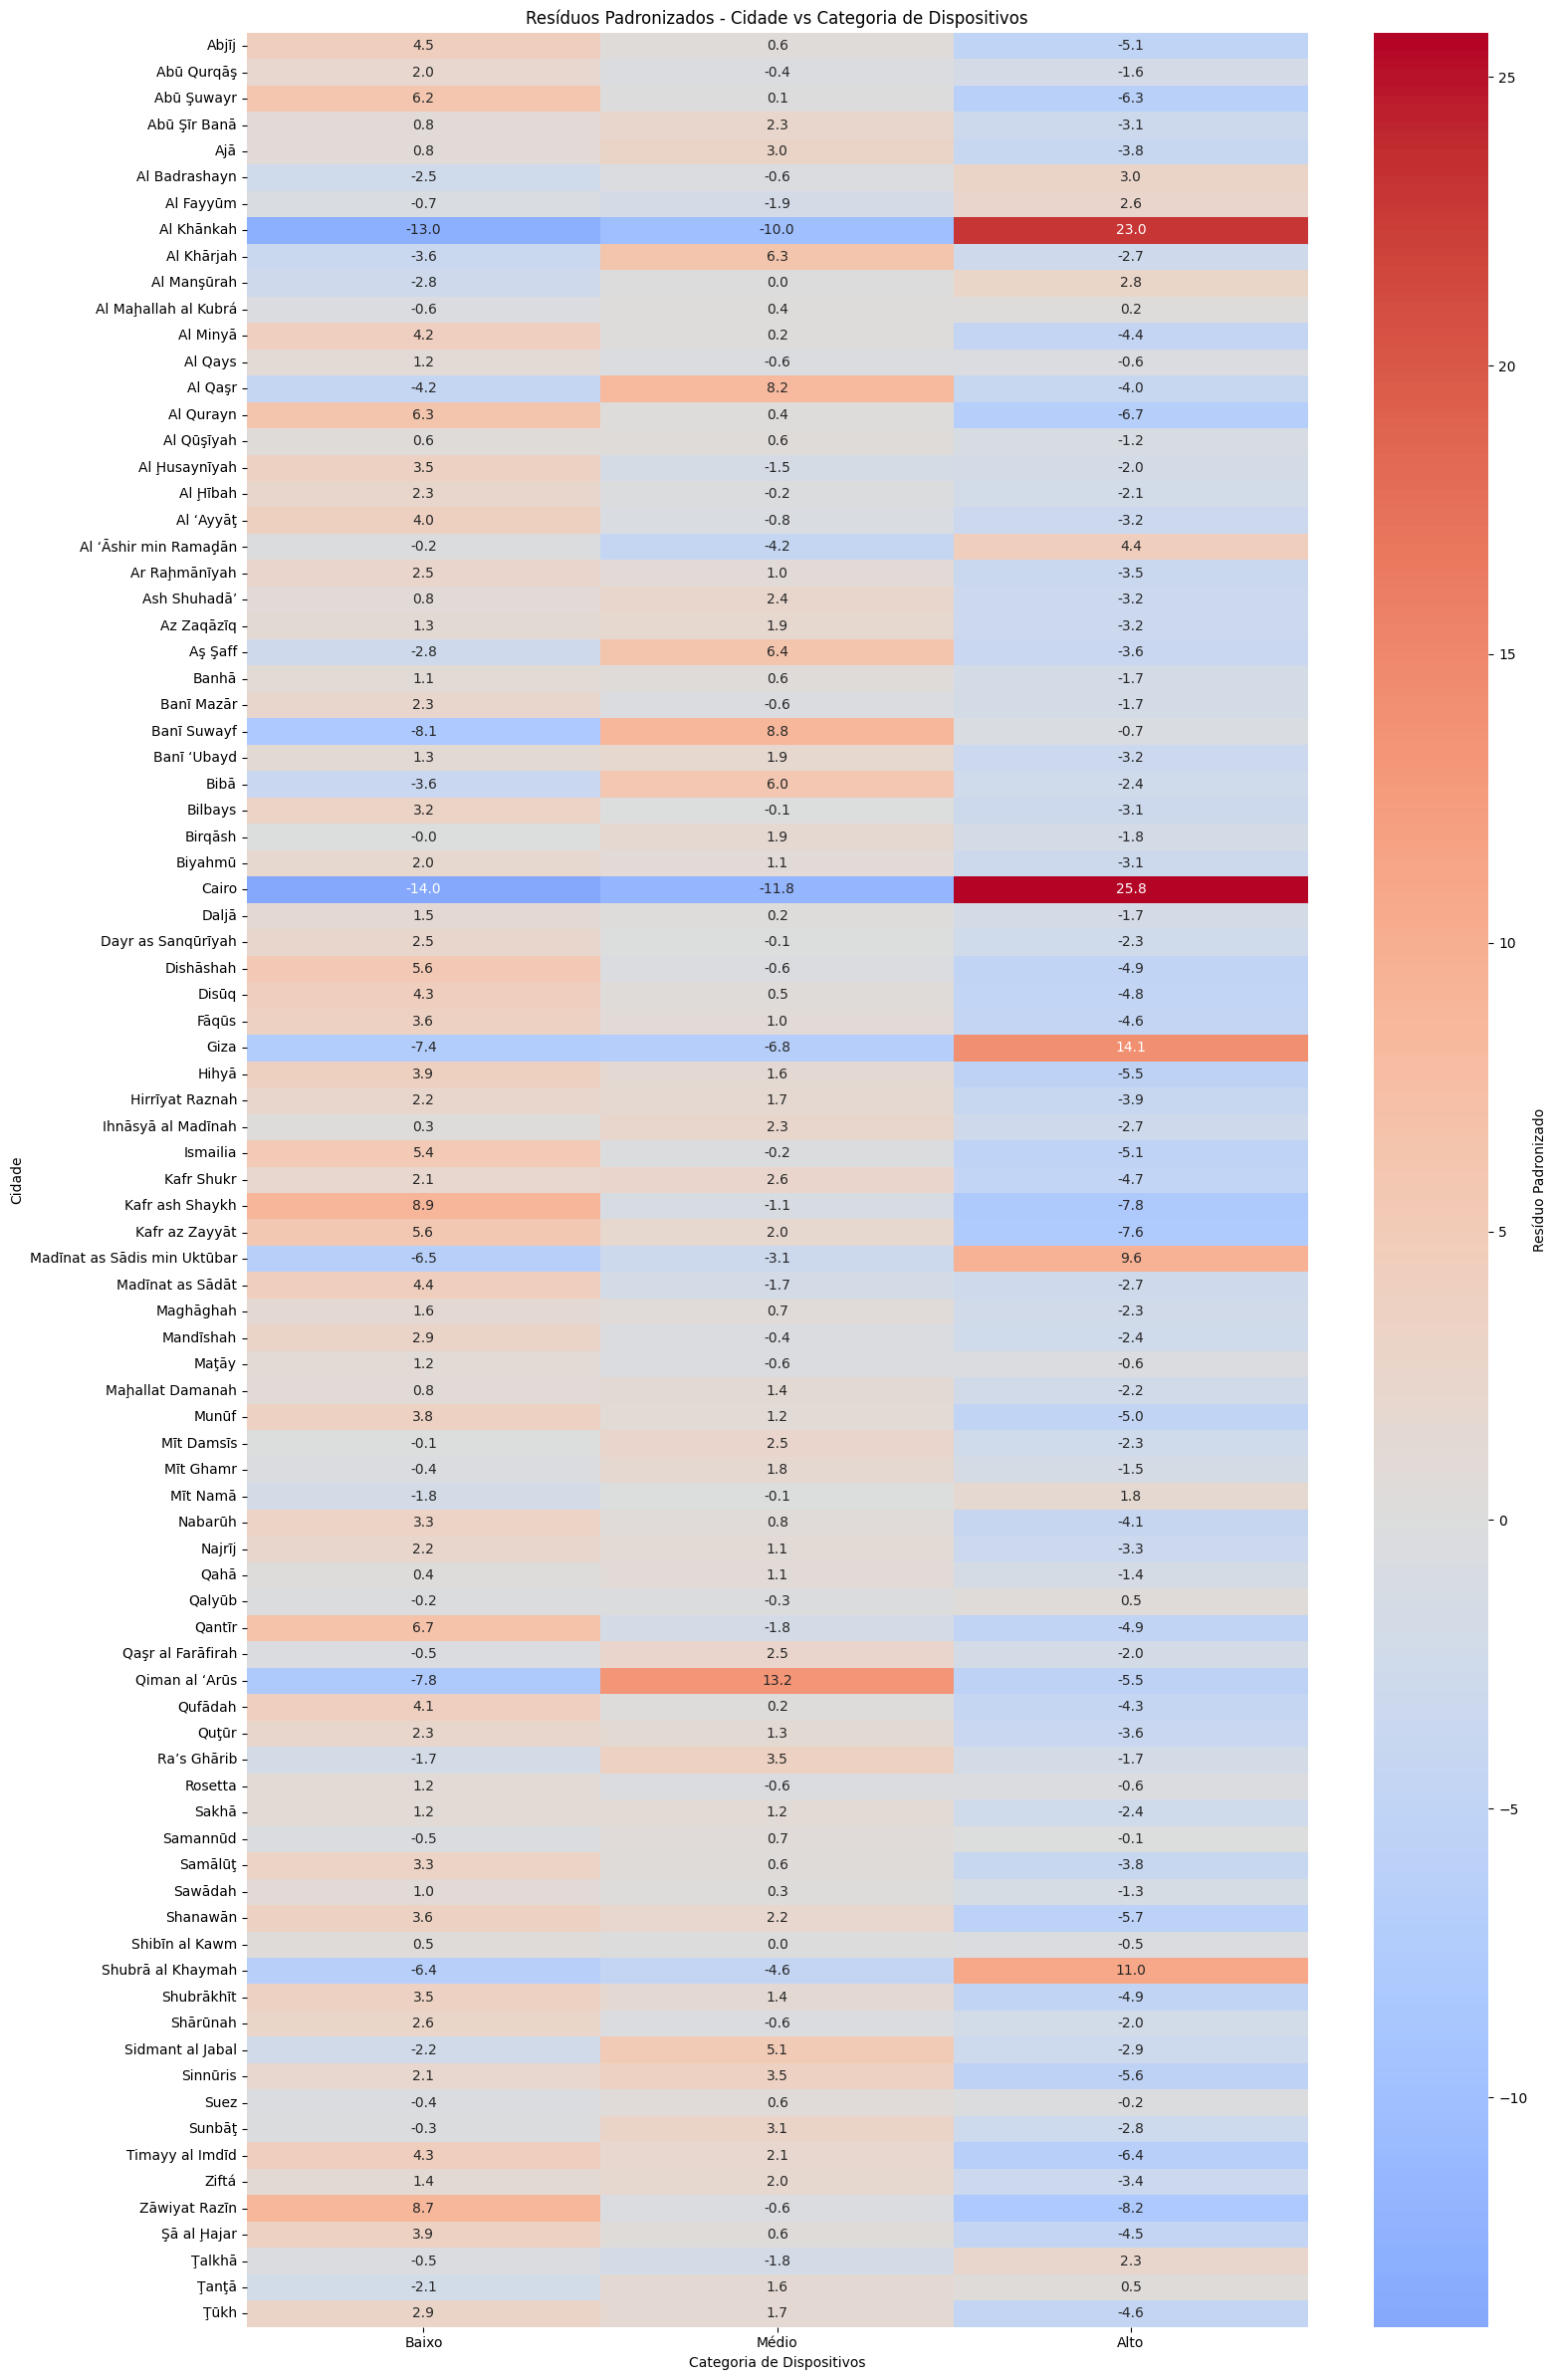

In [ ]:
# 1. Calcular a tabela esperada
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 2. Calcular os resíduos padronizados
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)

# 3. Transformar em DataFrame
residuals_df = pd.DataFrame(residuals,
                            index=contingency_table.index,
                            columns=contingency_table.columns)

# 4. Visualização com Heatmap
plt.figure(figsize=(16, 24))
sns.heatmap(residuals_df, cmap='coolwarm', center=0, annot=True, fmt=".1f", cbar_kws={"label": "Resíduo Padronizado"})
plt.title("Resíduos Padronizados - Cidade vs Categoria de Dispositivos")
plt.xlabel("Categoria de Dispositivos")
plt.ylabel("Cidade")
plt.tight_layout()
plt.show()


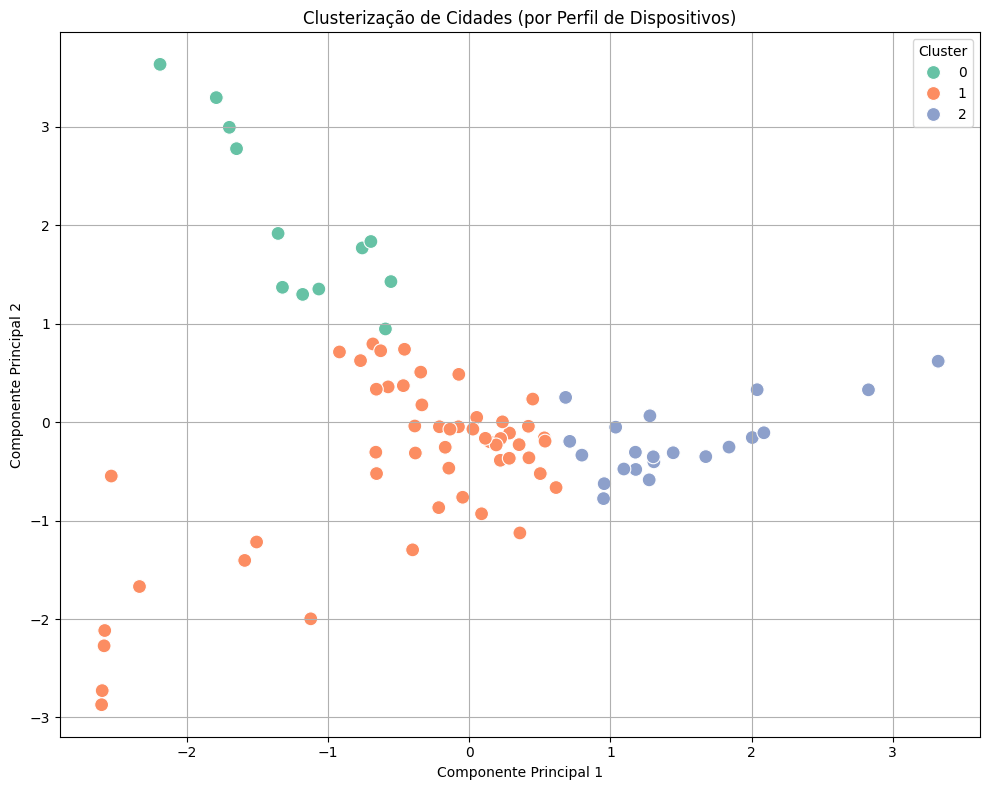

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Normalizar a tabela (proporções por cidade)
city_profile = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# 2. Padronizar os dados (opcional mas recomendado para K-Means)
scaler = StandardScaler()
city_scaled = scaler.fit_transform(city_profile)

# 3. Aplicar K-Means (definindo 3 clusters como exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(city_scaled)

# 4. Adicionar o cluster ao DataFrame
clustered_cities = city_profile.copy()
clustered_cities['cluster'] = clusters

# 5. Visualização com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(city_scaled)
clustered_cities['pca1'] = pca_result[:, 0]
clustered_cities['pca2'] = pca_result[:, 1]

# 6. Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clustered_cities, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title("Clusterização de Cidades (por Perfil de Dispositivos)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
